<a href="https://colab.research.google.com/github/dinog0d/Lab_Biose_Dinoequipo/blob/main/Proyecto4/P4_LauraLlanos_DaironMontes_AnnyRaigoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 4: Clasificación de señales ECG

Plantilla de gráficos:

In [1]:
import matplotlib.pyplot as plt

# Colores personalizados: una paleta más suave, con tonos más sutiles.
COLORES = ['#81C784', '#388E3C', '#F48FB1', '#F50057', '#64B5F6', '#1976D2','#4169E1']

# Configuración general para las gráficas
def configurar_plantilla():
    plt.rcParams.update({
        # Títulos
        'axes.titlesize': 18,  # Títulos más grandes para mayor claridad
        'axes.titleweight': 'normal',  # Peso normal para títulos
        'axes.labelsize': 14,  # Etiquetas de los ejes en tamaño moderado
        'axes.labelweight': 'normal',  # Peso normal en etiquetas de los ejes
        # Ticks (marcas en los ejes)
        'xtick.labelsize': 12,  # Etiquetas de los ticks (eje x)
        'ytick.labelsize': 12,  # Etiquetas de los ticks (eje y)
        # Leyenda
        'legend.fontsize': 10,  # Leyenda más pequeña pero legible
        # Figura
        'figure.figsize': (10, 6),  # Tamaño de la figura (ancho, alto)
        'figure.dpi': 120,  # Resolución más alta para mejorar la calidad visual
        # Estilo de la fuente
        'font.sans-serif': 'Liberation Sans Narrow',  # Usar Liberation Sans Narrow
        'font.weight': 'normal',  # Peso normal para que no sea demasiado pesado
        'font.size': 12,  # Tamaño de la fuente moderado para el gráfico
        # Líneas
        'lines.linewidth': 1.5,  # Líneas un poco más finas para no sobrecargar
        # Cuadrícula
        'grid.color': '#D3D3D3',  # Color de la cuadrícula más suave
        'grid.linestyle': '--',  # Estilo de la cuadrícula más sutil
        # Estilo general
        'axes.grid': True,  # Mostrar la cuadrícula
        'axes.edgecolor': '#B0B0B0',  # Bordes de los ejes más suaves
        'axes.linewidth': 0.8,  # Borde más delgado para los ejes
        'figure.autolayout': True,  # Ajuste automático del diseño
    })

    # Usar estilo 'seaborn-white' para un aspecto más limpio y moderno
    plt.style.use('ggplot')

# Llama a la función para aplicar la plantilla de configuración
configurar_plantilla()


## Contexto del problema:

> Las enfermedades cardiovasculares son una de las principales causas de muerte en todo el mundo, y la Organización Mundial de la Salud (OMS) estimó que 17,9 millones de personas murieron en 2019 por este tipo de enfermedades. Las enfermedades cardiovasculares están relacionadas con problemas de salud que afectan el corazón y los vasos sanguíneos. El riesgo de estas enfermedades aumenta con el tabaquismo, la presión arterial alta, el colesterol alto, una dieta poco saludable, la falta de ejercicio y la obesidad.

> El uso de la tecnología puede mejorar los tratamientos sanitarios y el seguimiento con la ayuda de diferentes sensores disponibles en los dispositivos que son cada vez de mayor uso. También, debido al bajo costo de algunos dispositivos de Electrocardiografía (ECG), el personal de salud puede tener a disposición la medición de la actividad eléctrica cardiaca.

> Parámetros fisiológicos como la frecuencia cardíaca, la presión arterial y la temperatura corporal que se miden habitualmente en entornos clínicos son muy relevantes, pero estos parámetros tienen alta variabilidad por lo que se requieren mediciones en grandes conjuntos de sujetos de manera que se capture dicha variabilidad para la construcción de modelos.

> Sin embargo, el avance en el uso de las bioseñales implica tener los diferentes conjuntos de datos relacionados con diversas enfermedades cardiovasculares debidamente procesadas y etiquetadas , implicando la necesidad de analizar proyectos como MIT-BIH o en Physionet, para disponer de la cantidad de datos necesarios para construir modelos con alto poder diagnóstico o predictivo. El enfoque de grandes volúmenes de datos también permite validar los procedimientos de procesamiento y análisis en diferentes poblaciones y tecnologías aumentando la pertinencia de las tecnologías desarrolladas.

> Un electrocardiograma (ECG) es un registro de la actividad eléctrica del corazón. Se usa ampliamente en entornos clínicos para detectar afecciones cardiovasculares, como ataques cardíacos y alteraciones del ritmo que cambian la actividad eléctrica del corazón. Un ECG se mide colocando electrodos en el pecho y las extremidades de un paciente, que registran diferentes aspectos de la actividad eléctrica de su corazón, y cada aspecto está etiquetado como una derivación.

> Un ECG convencional consta de 12 derivaciones, que proporcionan una visión completa de la actividad eléctrica del corazón. Seis de las derivaciones se obtienen colocando cuatro electrodos, uno en cada extremidad, proporcionando las derivaciones I, II, III, VL, VF y VR. Se colocan seis electrodos en el tórax, que proporcionan los cables V1 a V6. La derivación de aplicación más inmediata es la II. La amplitud de la señal del ECG está dentro del rango de 0.01 mV a 4 mV. La frecuencia más importante de esta señal se encuentra dentro del rango de 0,05 a 100 Hz.

## Primera parte:

Revisión teórica del artículo: https://www.nature.com/articles/s41598-020-59821-7

Realizar un resumen de la sección extracción de caracteríticas (Features extraction) para el artículo *Optimal Multi-Stage Arrhythmia Classification Approach* discutir desde el artículo u otras referencias como se hace cuando desaparecen ciertas formas de ondas en el complejo PQRS debido a alguna enfermedad.

La metodología del artículo ‘Optimal Multi-Stage Arrhythmia Classification Approach’ se centra en mejorar la clasificación de arritmias cardíacas a partir de electrocardiogramas utilizando un enfoque de reducción de ruido en tres etapas:
1.	Filtro Butterworth para eliminae ruidos de alta frecuencia (50 Hz).
2.	Robust LOESS para eliminar las oscilaciones de la línea base del ECG.
3.	Non Local Means para eliminar el ruido residual.

Para poder extraer las características específicas que representen de manera más compacta y significativa los patrones asociados con las diferentes arritmias, los autores hicieron:


> ***Preprocesamiento de las señales.***

Antes de la extracción de características, las señales de ECG fueron limpiadas para eliminar ruido, artefactos y otras interferencias. Esto garantiza que las características extraídas reflejen la verdadera actividad cardíaca y no errores o señales externas.


> ***Segmentación de las señales.***

Se dividieron las señales en segmentos correspondientes a cada latido cardíaco. Esto permitió aislar eventos específicos como las ondas P, QRS y T, que son fundamentales para identificar irregularidades.


> ***Análisis de dominios.***


*   Dominio temporal → Se extrajeron características relacionadas con la duración, amplitud y forma de las ondas del ECG. Por ejemplo, se analizaron los intervalos entre ondas (como RR, PR y QT), ya que estos valores pueden cambiar significativamente en diferentes tipos de arritmias.
*   Dominio frecuencial → Se aplicaron transformaciones como la transformada de Fourier para estudiar las frecuencias presentes en la señal. Las alteraciones en ciertas bandas de frecuencia pueden estar asociadas con tipos específicos de arritmias.
*   Análisis de tiempo-frecuencia → Se utilizó la transformada wavelet para capturar variaciones locales en el tiempo y la frecuencia, lo que es útil para detectar eventos transitorios o arritmias que ocurren de manera intermitente.


> ***Extracción de características no lineales.***

Dado que las señales de ECG pueden presentar comportamientos caóticos, se incluyeron medidas no lineales como la entropía, que reflejan la complejidad de la señal. Esto es especialmente relevante para arritmias complejas.

> **ARTÍCULO 1. Detection of Heart Blocks in ECG Signals by Spectrum and Time-Frequency Analysis [12]**

  El artículo analiza *bloqueos cardíacos*, una condición en la cual los impulsos eléctricos que regulan los latidos del corazón no se transmiten correctamente a través del sistema de conducción cardíaco.

  Los bloqueos cardíacos interrumpen la transmisión del impulso eléctrico desde el nodo sinoauricular (SA) hacia los ventrículos. Esto causa la desaparición o alteración de ciertas ondas del ECG debido a retrasos o bloqueos totales en la conducción eléctrica o desincronización entre las contracciones auriculares y ventriculares.

  El estudio emplea *técnicas de procesamiento digital de señales (DSP)* para analizar las variaciones del ECG y mejorar la detección de bloqueos cardíacos. Para esto, usaron un espectro de Potencia del Periodograma para bservar cómo se distribuye la potencia de la señal en función de la frecuencia, dado que, en sujetos normales, la frecuencia pico se encuentra alrededor de 8 Hz. En pacientes con bloqueos, esta frecuencia es significativamente más baja (< 4 Hz).  

  Adicionalmente, hicieron uso de un espectrograma de Tiempo-Frecuencia, que representa simultáneamente la frecuencia y el tiempo, mostrando cómo cambian las características de la señal a lo largo del tiempo. Esto es útil para identificar patrones que el periodograma por sí solo no detecta, como la periodicidad de ciertas señales en bloqueos avanzados.  

  En conclusión, los autores desarrollaron un sistema computarizado que combina  técnicas de Simulaciones con MATLAB y una interfaz gráfica (GUI) en Visual Basic para visualizar los resultados, todo esto para diferenciar entre ECG normales y aquellos con bloqueos cardíacos, además de clasificar pacientes en siete categorías de diagnóstico (normal, distintos grados de bloqueos AV y bloqueos de rama).




> **ARTÍCULO 2. Developing neural network models for early detection of cardiac arrest in emergency department [13]**

  El artículo aborda el paro cardíaco, una condición médica crítica que ocurre cuando el corazón deja de bombear sangre de manera efectiva, lo que resulta en la pérdida de conciencia y, si no se trata rápidamente, en la muerte. En el entorno de los departamentos de emergencia (ED), el paro cardíaco puede estar precedido por alteraciones sutiles en los signos vitales y el estado de consciencia hasta 24 horas antes del evento. Sin embargo, la sobrecarga de pacientes y recursos en los ED dificulta la identificación temprana de aquellos en riesgo.

  En pacientes en riesgo de paro cardíaco, la actividad eléctrica del corazón puede deteriorarse progresivamente, alterando las señales del electrocardiograma. Esto puede incluir la desaparición de ondas como la onda P (indicativa de actividad auricular) o la alteración de la onda QRS (representativa de la actividad ventricular). Estas anomalías suelen estar relacionadas con isquemia, hipoxia, o disfunción eléctrica previa al paro, y reflejan un estado cardíaco crítico.

  Para abordar este problema, los autores desarrollaron y evaluaron modelos de redes neuronales artificiales (ANN) para la predicción temprana de paros cardíacos en pacientes en ED. Tres arquitecturas fueron probadas:

*   Multilayer Perceptron (MLP): Utiliza variables de base como edad, sexo, signos vitales iniciales y el nivel de consciencia para generar predicciones.
*   Long-Short Term Memory (LSTM): Integra datos secuenciales de hasta 12 mediciones recientes (en las últimas 6 horas) para analizar patrones temporales.
*   Modelo Híbrido: Combina las arquitecturas de MLP y LSTM, procesando datos basales y secuenciales antes de fusionarlos para una predicción más precisa.
  
El modelo híbrido mostró el mejor desempeño, superando significativamente los métodos tradicionales como la regresión logística, bosques aleatorios (random forest), y el sistema de alerta temprana MEWS.

## Segunda parte:

De la base de datos proporcionada por https://figshare.com/collections/ChapmanECG/4560497/1 extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation).

Del proyecto pasado hay dos opciones de base de datos, la filtrada por los autores o la filtrada en el proyecto 3. De acuerdo a los resultados del proyecto 3 usar la mejor base de datos y justificar la selección.

Justificación: Usaré las de los autores, porqué quiero puedo y no me da miedo.

In [2]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo Excel
diagnostics_ruta = '/content/drive/MyDrive/Colab Notebooks/Proyecto4/Diagnostics.xlsx'
diagnostics = pd.read_excel(diagnostics_ruta)  # Leer los datos del archivo Excel

# Obtener los valores de interés: registro (FileName), edad (PatientAge) y género (Gender)
directoriosSB = []  # Lista para 'SB'
directoriosAFIB = []  # Lista para 'AFIB'

# Iterar sobre las filas del DataFrame
for _, fila in diagnostics.iterrows():
    registro = fila['FileName']
    ritmo = fila['Rhythm']
    edad = fila['PatientAge']
    genero = fila['Gender']

    if ritmo == 'SB' and registro != 'MUSE_20180113_124215_52000':  # Condición para 'SB'
        directoriosSB.append((registro, edad, genero))
    elif ritmo == 'AFIB':  # Condición para 'AFIB'
        directoriosAFIB.append((registro, edad, genero))

# Mostrar resultados
print(f"Tamaño de la lista directorios SB: {len(directoriosSB)}")
print(f"Tamaño de la lista directorios AFIB: {len(directoriosAFIB)}")

# Mostrar algunos registros para verificar
print("Directorios SB (primeros 5 registros):", directoriosSB[:5])
print("Directorios AFIB (primeros 5 registros):", directoriosAFIB[:5])


Mounted at /content/drive
Tamaño de la lista directorios SB: 3888
Tamaño de la lista directorios AFIB: 1780
Directorios SB (primeros 5 registros): [('MUSE_20180112_073319_29000', 59, 'FEMALE'), ('MUSE_20180113_121940_44000', 66, 'MALE'), ('MUSE_20180112_120347_79000', 46, 'FEMALE'), ('MUSE_20180114_075128_92000', 45, 'MALE'), ('MUSE_20180118_174026_42000', 47, 'FEMALE')]
Directorios AFIB (primeros 5 registros): [('MUSE_20180113_171327_27000', 85, 'MALE'), ('MUSE_20180114_075026_69000', 80, 'FEMALE'), ('MUSE_20180113_133901_16000', 67, 'FEMALE'), ('MUSE_20180116_123940_90000', 81, 'MALE'), ('MUSE_20180114_075003_61000', 81, 'MALE')]


## Tercera parte

Sección de herramientas computacionales.

Realizar un minitutorial del uso de la herramienta NeuroKit (https://neuropsychology.github.io/NeuroKit/index.html) orientado al análisis de señales ECG.

## Cuarta parte:

Aplicando el minitutorial de la parte anterior con las señales seleccionadas:



### Instalación

In [3]:
!pip install neurokit2
!pip install PyWavelets
!pip install ts2vg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.1 MB/s eta 0:00:00


### Preprocesamiento de la señal:

Normalización:

In [4]:
import numpy as np

def normalizacion(datos, grado=2):
    # Función interna para aplicar detrend (ajuste polinómico)
    def ajusteDetrend(datos, grado=2):
        coeficientes = np.polyfit(range(len(datos)), datos, grado)
        valores_ajustados = np.polyval(coeficientes, range(len(datos)))

        datos_detrendeados = datos - valores_ajustados  # Datos detrendeados por ajuste

        return datos_detrendeados

    # Función interna para compresión
    def compresion(datos):
        # Encontrando valores máximos y mínimos
        x_min = np.min(datos)
        x_max = np.max(datos)

        # Evitamos la división por 0
        if x_min == x_max:
            raise ValueError("Los datos solo tienen un único valor. No es posible hacer la compresión.")

        datos_comprimidos = (datos - x_min) / (x_max - x_min)

        return datos_comprimidos

    # Aplicamos el primer detrend
    datos_detrendeados = ajusteDetrend(datos, grado)

    # Aplicamos la compresión
    datos_comprimidos = compresion(datos_detrendeados)

    # Aplicamos el segundo detrend
    datos_finales = ajusteDetrend(datos_comprimidos, grado)

    return datos_finales

Procesamiento con bio_process()

Bio_process con archivo SB:


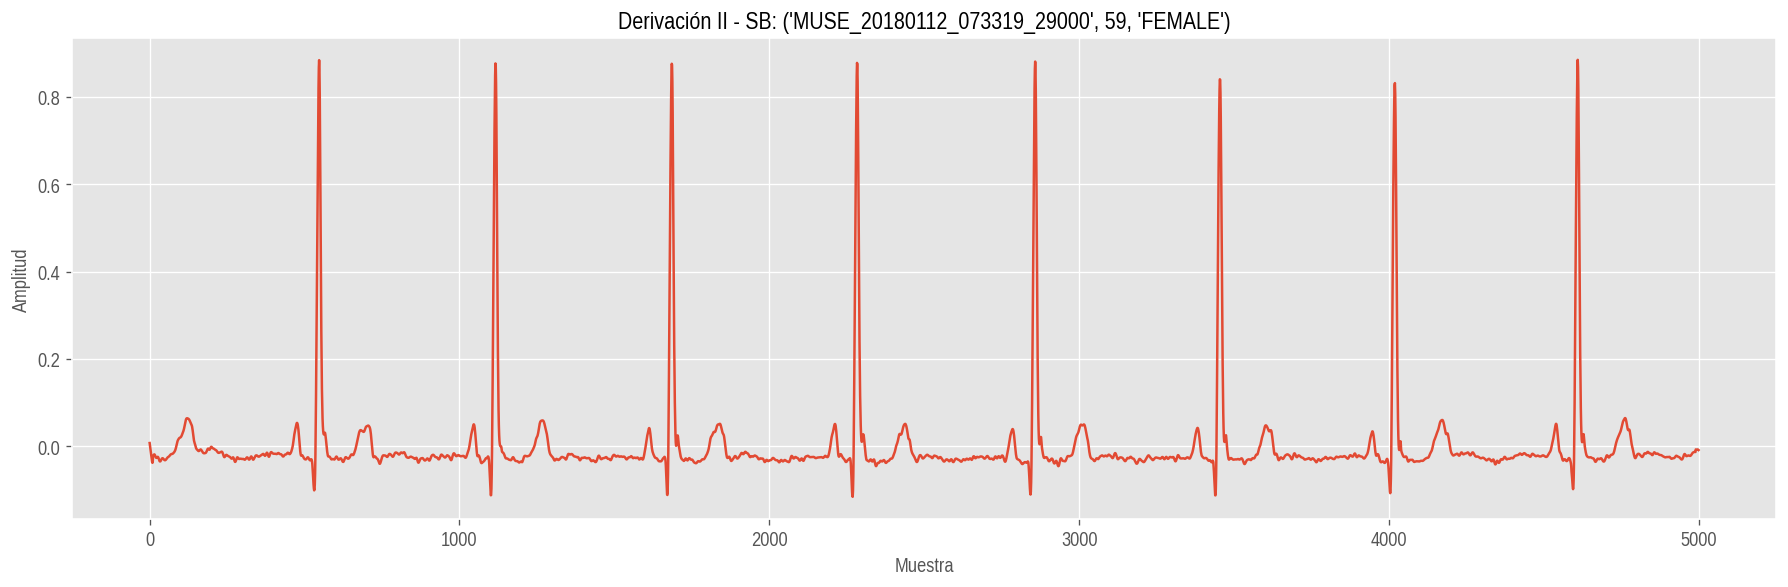

Señal Cruda:


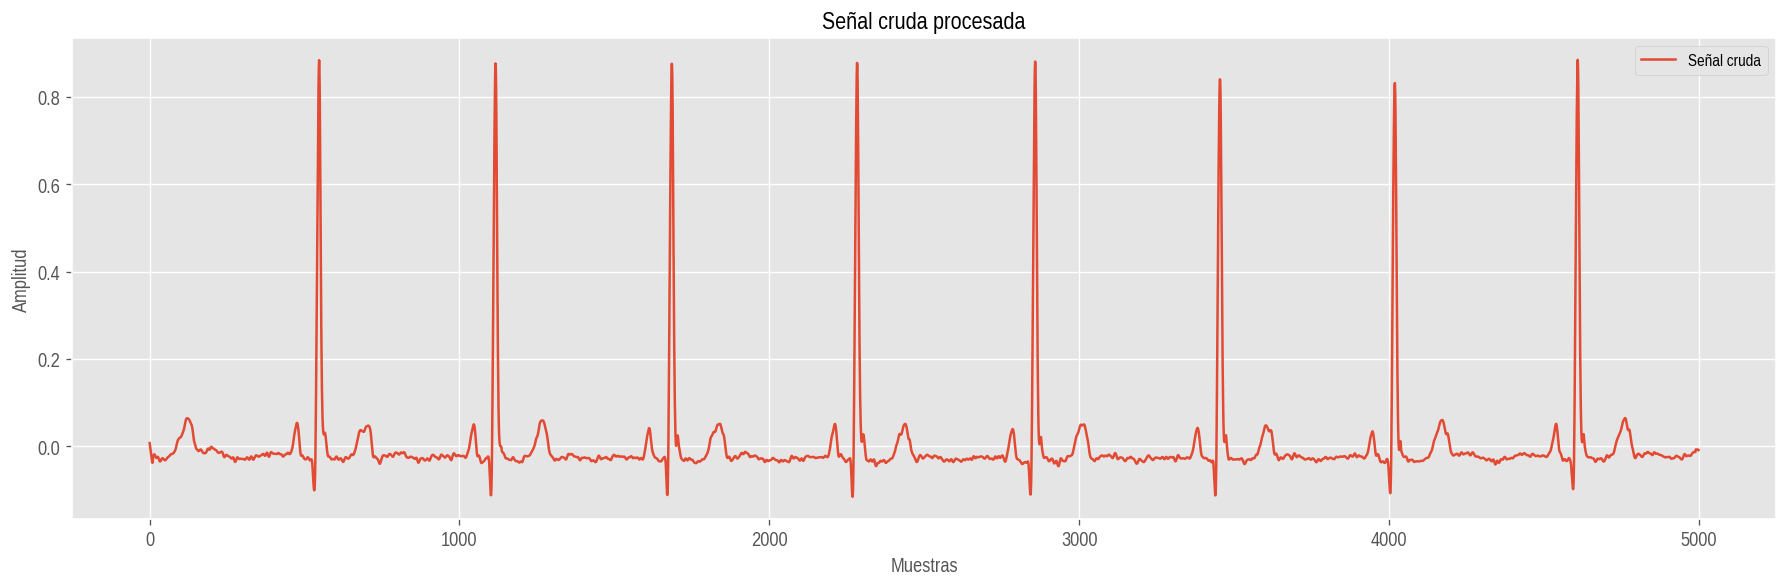


Señal Limpia por bio_process:


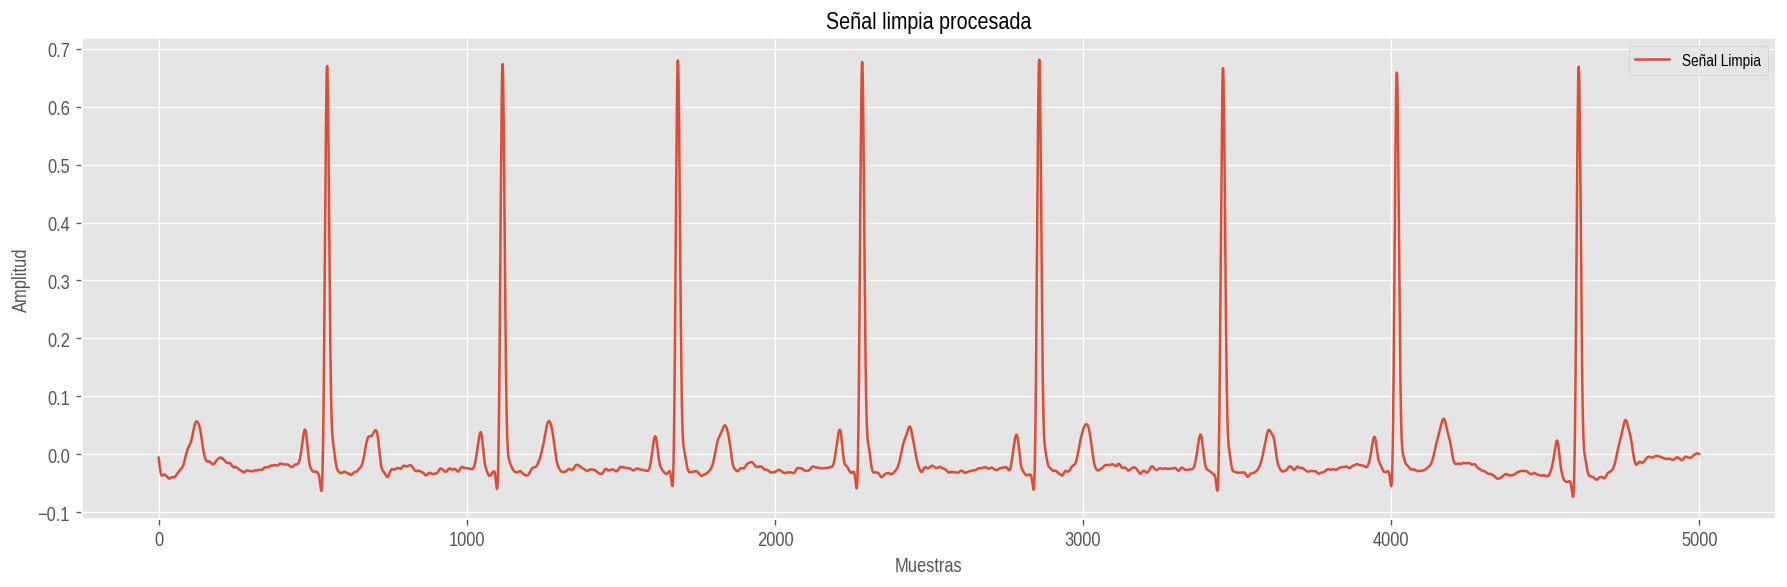


Frecuencia Cardíaca (lpm):
51.75423537819455

Índices de los Picos R:
[ 547 1116 1685 2283 2858 3454 4018 4609]

Intervalos RR (s):
[1.138 1.138 1.196 1.15  1.192 1.128 1.182]

Visualización de la señal procesada con los picos R detectados:


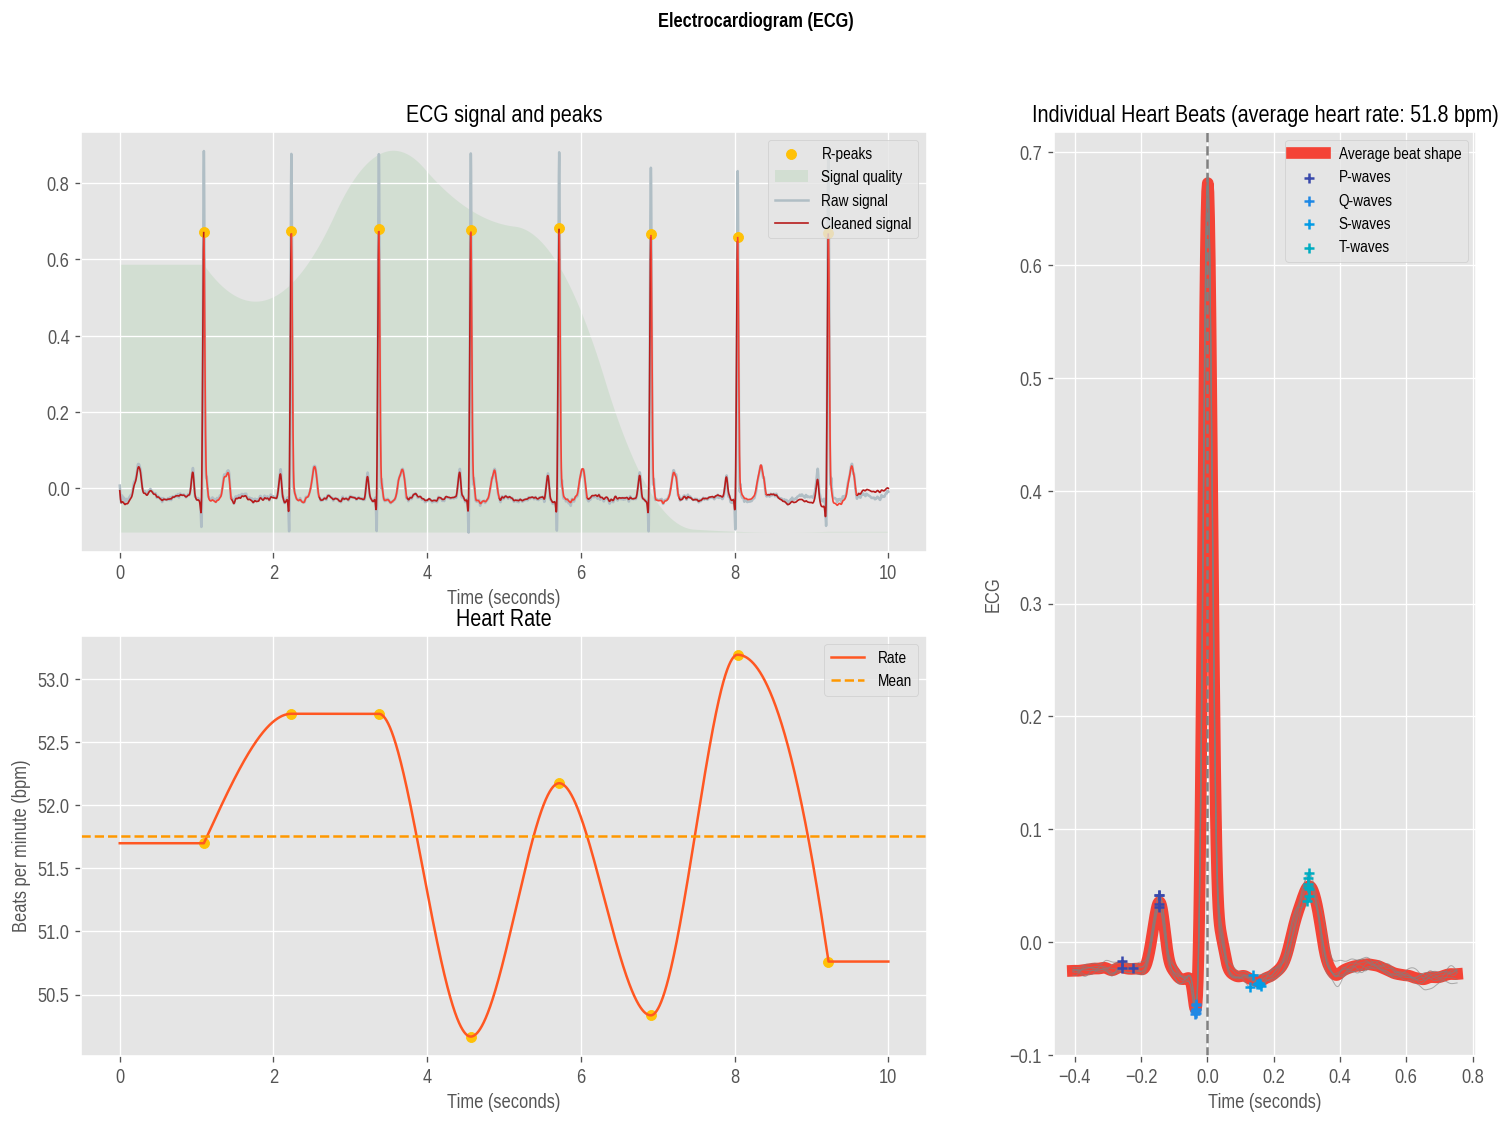

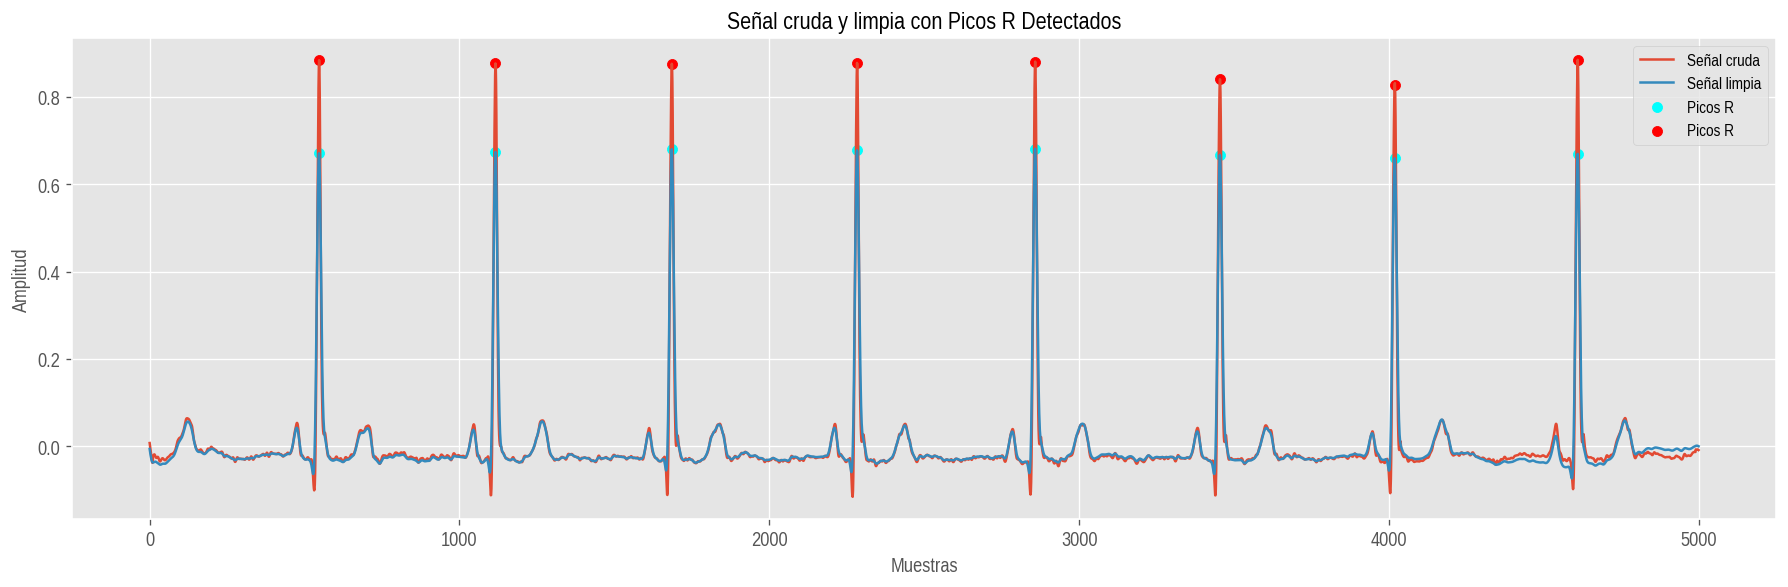

Bio_process con archivo AFIB:


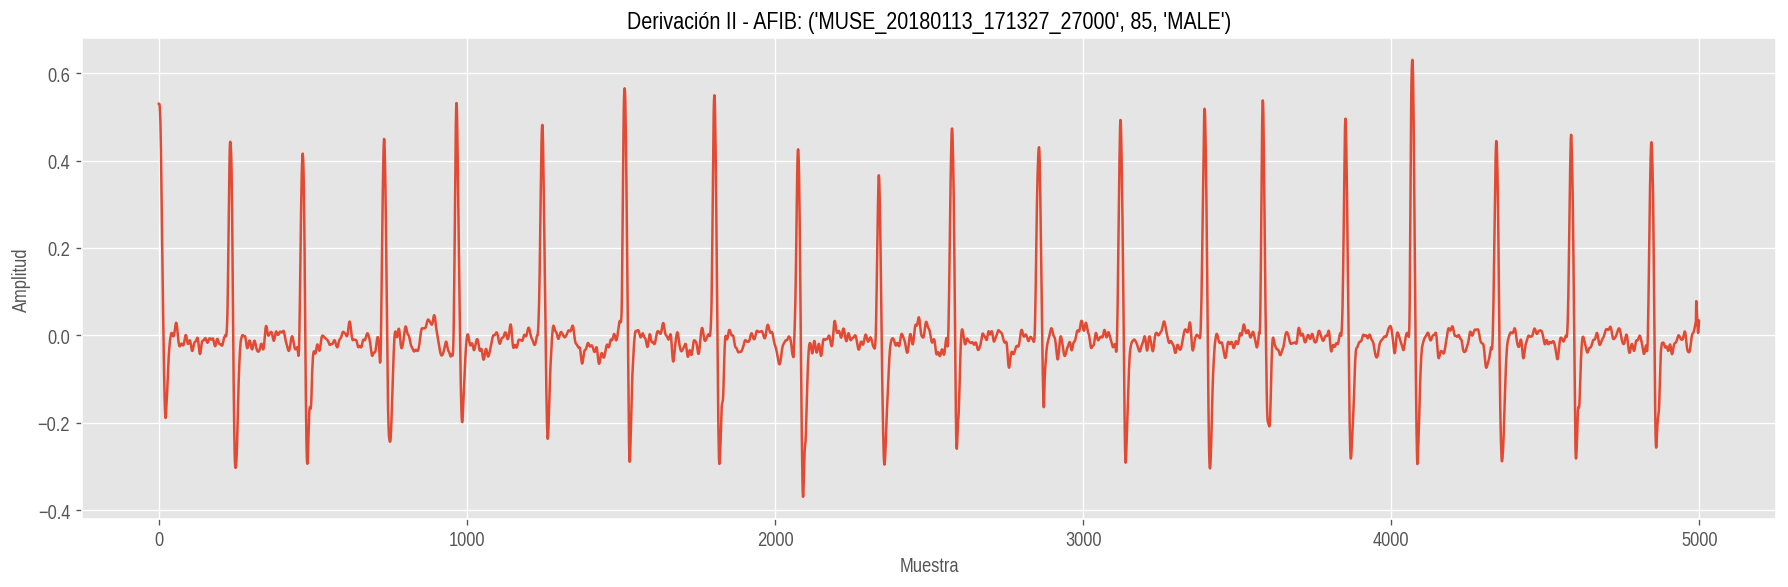

Señal Cruda:


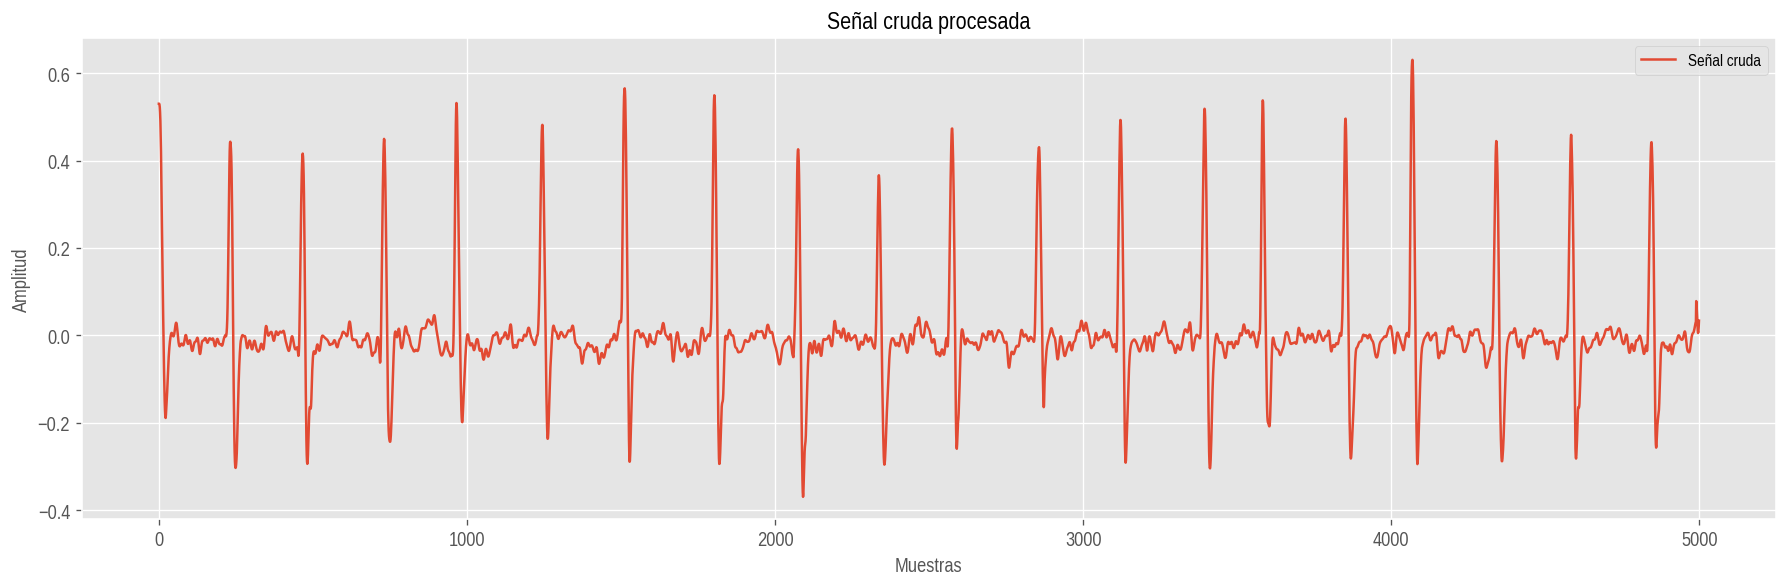


Señal Limpia por bio_process:


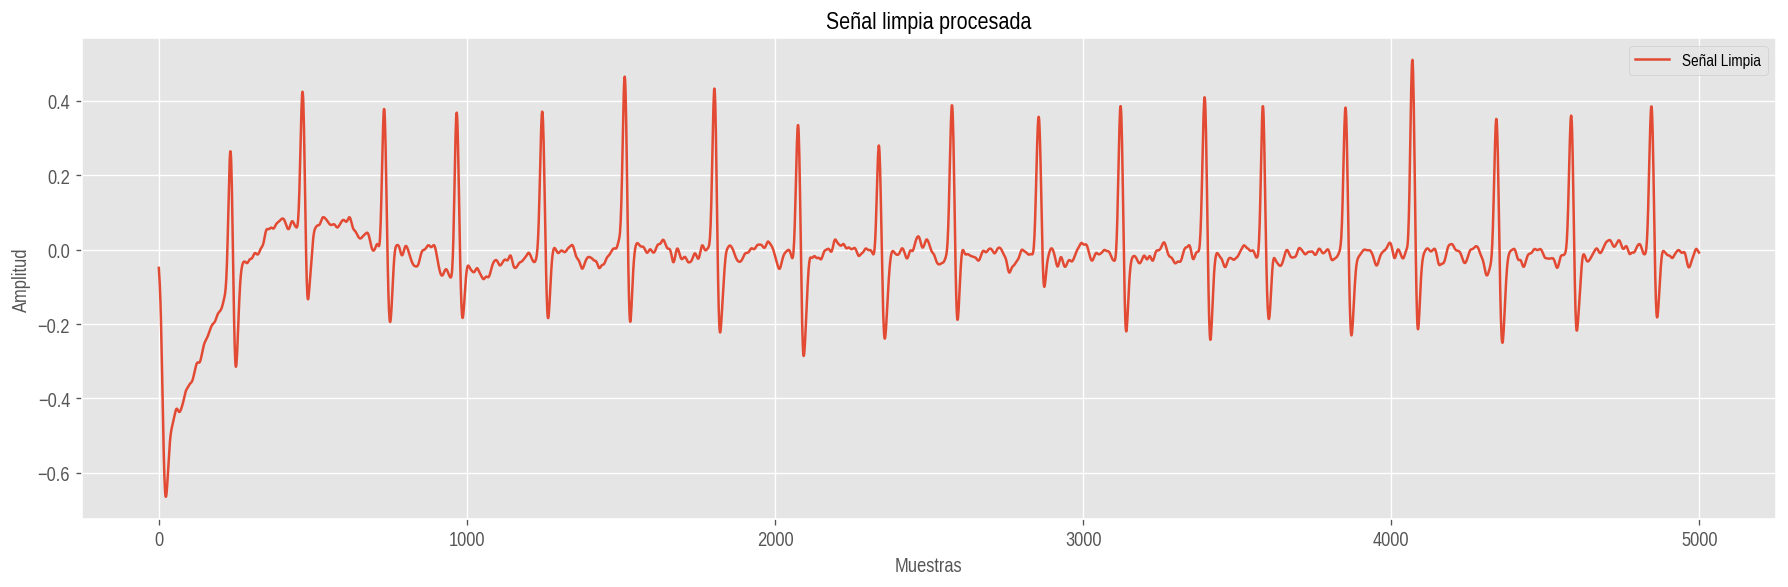


Frecuencia Cardíaca (lpm):
117.37150528793924

Índices de los Picos R:
[ 232  466  731  967 1244 1512 1803 2075 2337 2574 2848 3122 3394 3610
 3826 4069 4341 4584 4845]

Intervalos RR (s):
[0.468 0.53  0.472 0.554 0.536 0.582 0.544 0.524 0.474 0.548 0.548 0.544
 0.432 0.432 0.486 0.544 0.486 0.522]

Visualización de la señal procesada con los picos R detectados:


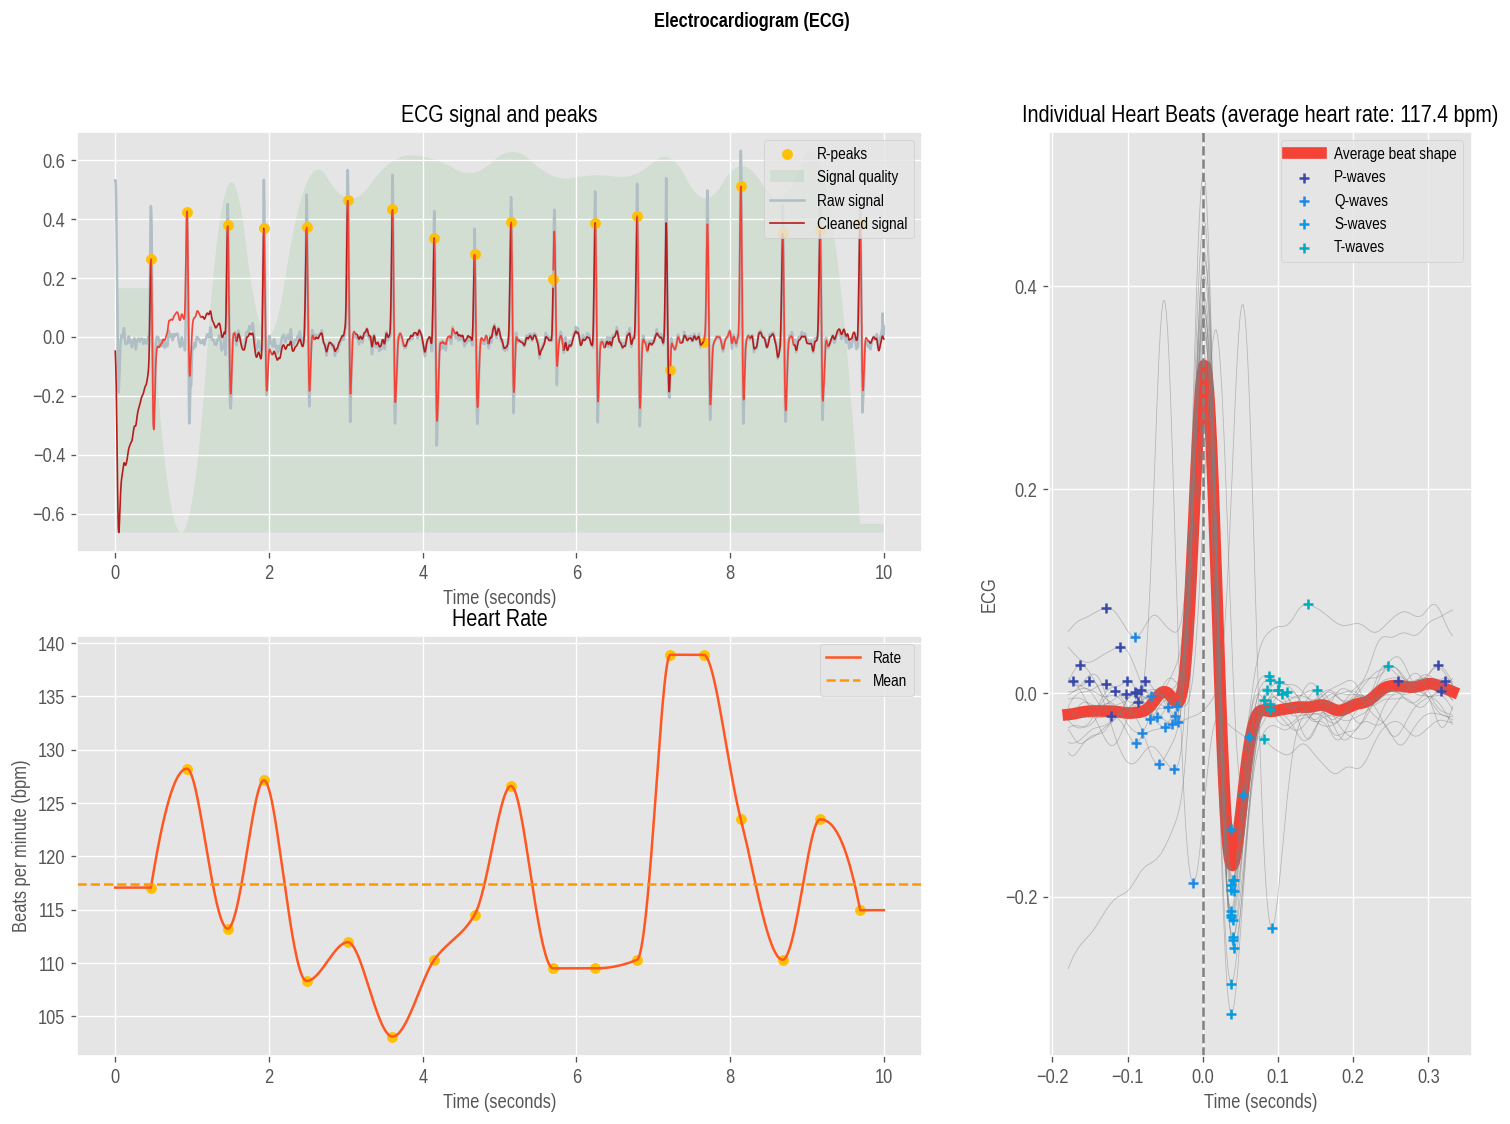

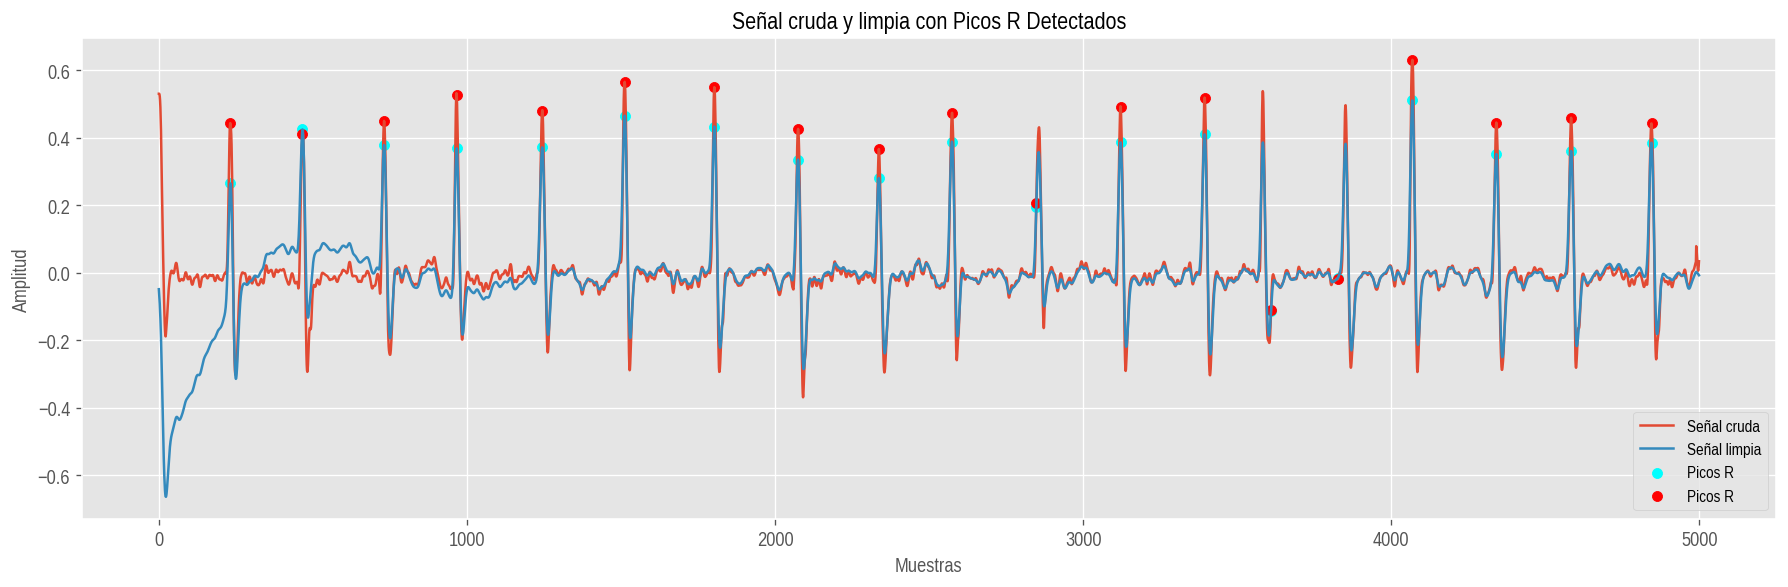

In [5]:
# Importar bibliotecas necesarias
import os
import pandas as pd
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

# Creamos una función para graficar la derivación II
def Procesar_BioProcess(directorios, tipo):
    for directorio in directorios[:1]:  # Puedes ajustar el número de archivos a observar
        csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/', directorio[0] + '.csv')  # Construye la ruta al archivo .csv

        try:
            derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])  # Lee el archivo .csv
            ecg_signal = pd.to_numeric(derivaciones['II'].values, errors='coerce')
            sampling_rate = 500  # Frecuencia de muestreo en Hz

            ecg_signal = normalizacion(ecg_signal)

            # Grafica la columna II
            plt.figure(figsize=(15, 5))
            plt.plot(ecg_signal)
            plt.title(f'Derivación II - {tipo}: {directorio}')
            plt.xlabel('Muestra')
            plt.ylabel('Amplitud')
            plt.show()

            # Procesamiento de la señal ECG
            bio_df, bio_info = nk.bio_process(ecg=ecg_signal, sampling_rate=sampling_rate)

            # Exploración de la señal procesada
            raw_signal = bio_df['ECG_Raw']         # Señal cruda
            clean_signal = bio_df['ECG_Clean']     # Señal limpia
            heart_rate = bio_df['ECG_Rate']  # Frecuencia cardíaca (lpm)
            heart_rate = np.mean(heart_rate)

            # Impresión de los resultados
            print("Señal Cruda:")
            plt.figure(figsize=(15, 5))
            plt.plot(raw_signal, label='Señal cruda')
            plt.title('Señal cruda procesada')
            plt.xlabel('Muestras')
            plt.ylabel('Amplitud')
            plt.legend()
            plt.show()

            print("\nSeñal Limpia por bio_process:")
            plt.figure(figsize=(15, 5))
            plt.plot(clean_signal, label='Señal Limpia')
            plt.title('Señal limpia procesada')
            plt.xlabel('Muestras')
            plt.ylabel('Amplitud')
            plt.legend()
            plt.show()

            print("\nFrecuencia Cardíaca (lpm):")
            print(heart_rate)

            # Obtener los índices de los picos R
            r_peaks = bio_info['ECG_R_Peaks']
            print("\nÍndices de los Picos R:")
            print(r_peaks)

            # Calcular los intervalos RR
            r_peaks_times = r_peaks / sampling_rate  # Convertir a tiempo en segundos
            rr_intervals = np.diff(r_peaks_times)    # Diferencias entre picos consecutivos

            print("\nIntervalos RR (s):")
            print(rr_intervals)

            # Visualización de los resultados
            print("\nVisualización de la señal procesada con los picos R detectados:")
            nk.ecg_plot(bio_df, info=bio_info)
            # Para guardar la figura generada en un archivo
            fig = plt.gcf()  # Obtiene la figura actual
            fig.set_size_inches(15, 10, forward=True)  # Ajusta el tamaño de la figura

            # Visualización manual de la señal limpia con los picos R
            plt.figure(figsize=(15, 5))
            plt.plot(raw_signal, label='Señal cruda')
            plt.plot(clean_signal, label='Señal limpia')
            plt.scatter(r_peaks, clean_signal[r_peaks.astype(int)], color='cyan', label='Picos R')
            plt.scatter(r_peaks, raw_signal[r_peaks.astype(int)], color='red', label='Picos R')
            plt.title('Señal cruda y limpia con Picos R Detectados')
            plt.xlabel('Muestras')
            plt.ylabel('Amplitud')
            plt.legend()
            plt.show()

        except FileNotFoundError:
            print(f"Archivo no encontrado: {csv_ruta}")

# Graficar para ambos tipos de datos
print("Bio_process con archivo SB:")
Procesar_BioProcess(directoriosSB, 'SB')
print("Bio_process con archivo AFIB:")
Procesar_BioProcess(directoriosAFIB, 'AFIB')

Procesamiento con ecg_process()

ECG_process con archivo SB:


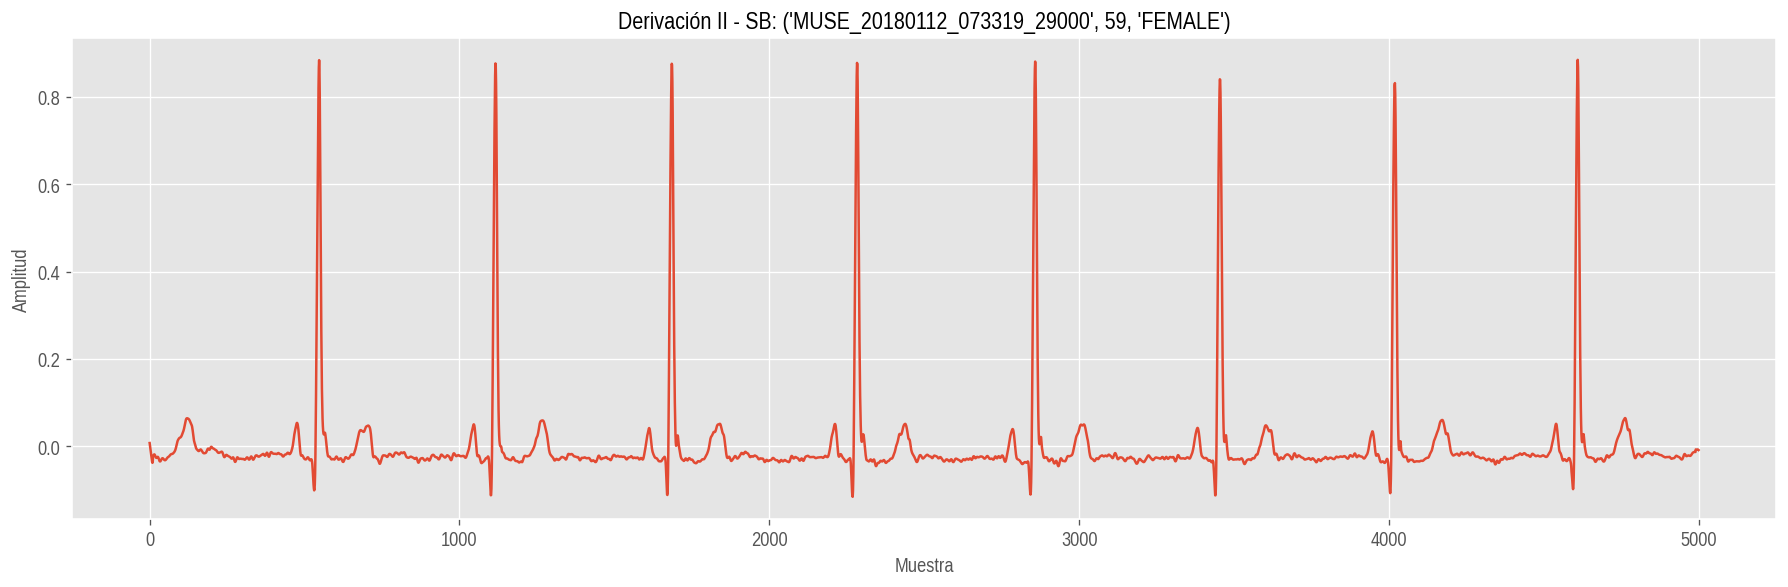

Señal Cruda:


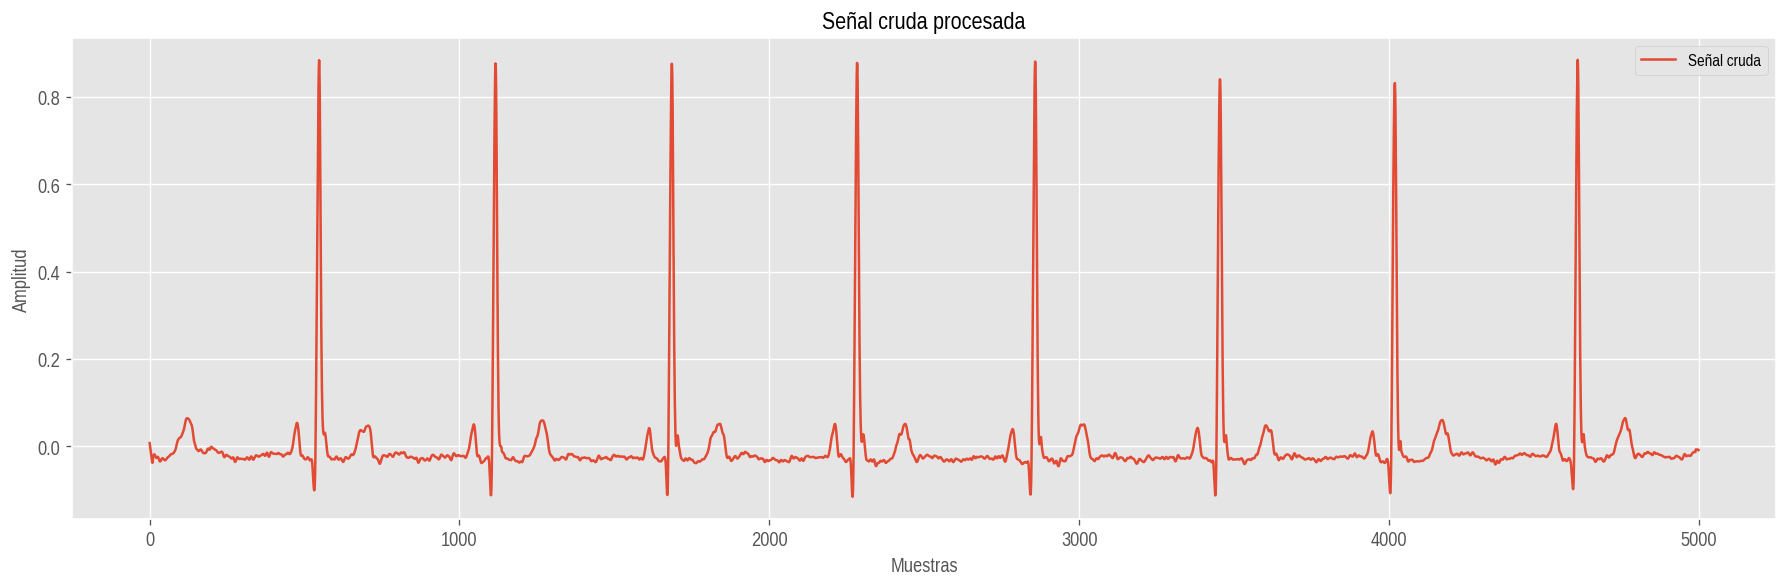


Señal Limpia por ecg_process:


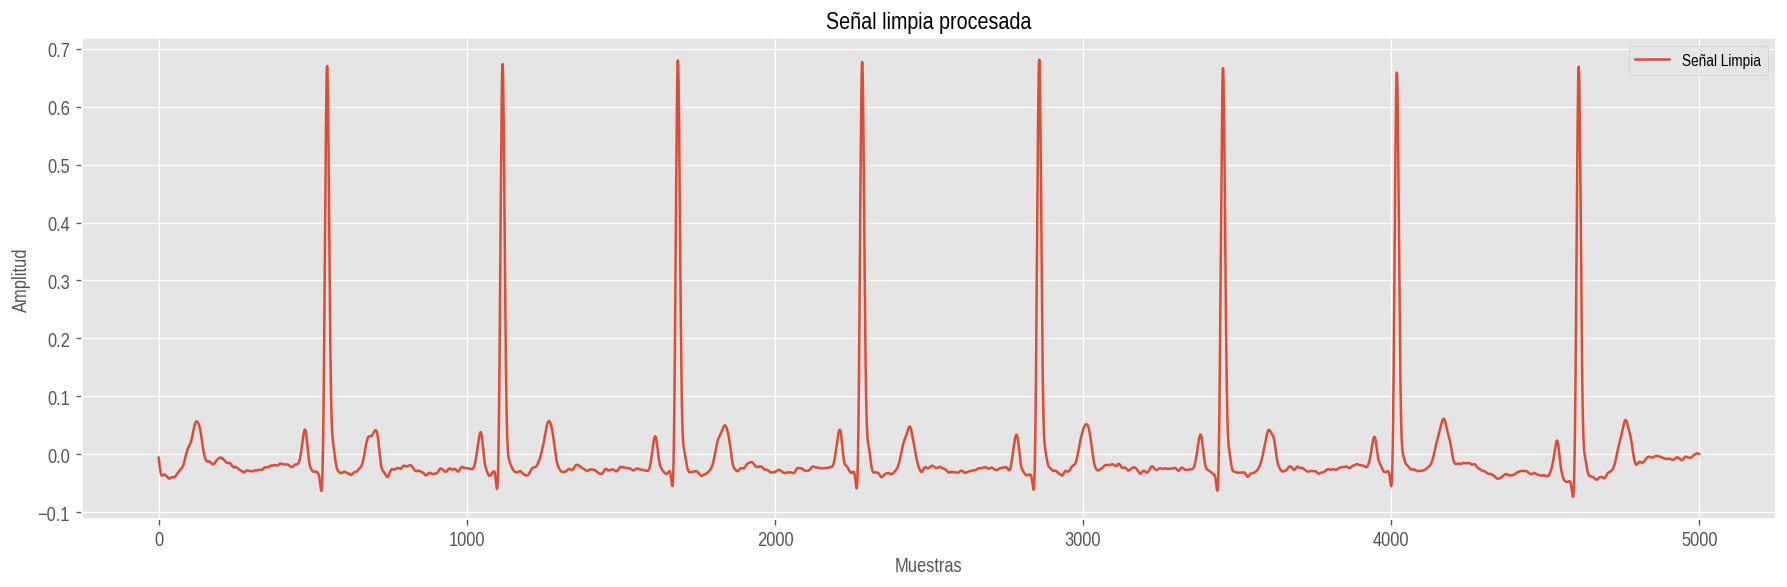


Frecuencia Cardíaca (lpm):
51.75423537819455

Índices de los Picos R:
[ 547 1116 1685 2283 2858 3454 4018 4609]

Intervalos RR (s):
[1.138 1.138 1.196 1.15  1.192 1.128 1.182]

Visualización de la señal procesada con los picos R detectados:


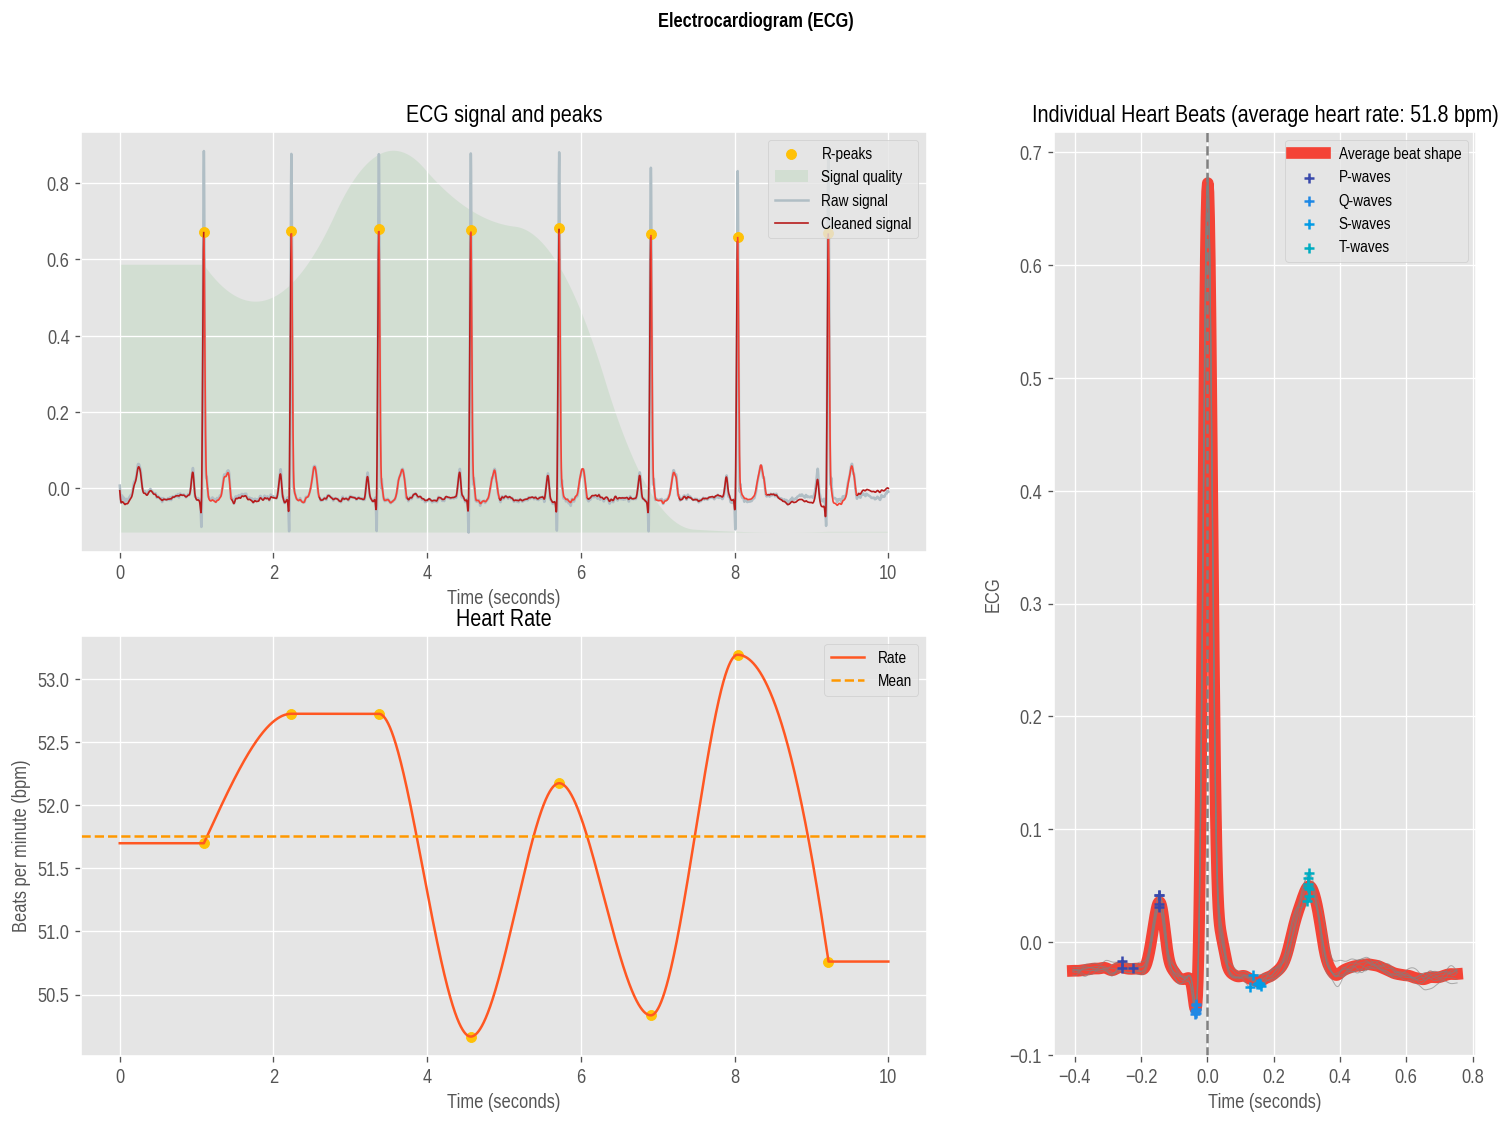

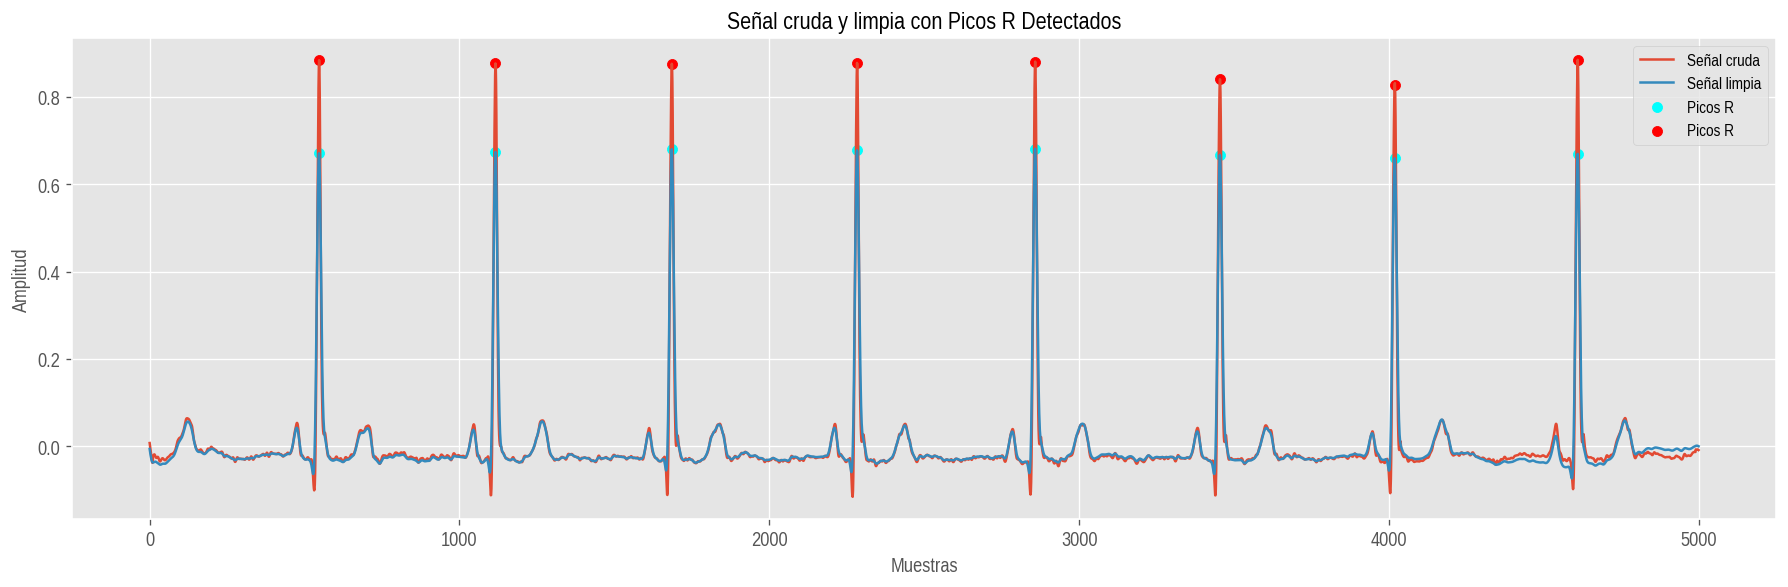

ECG_process con archivo AFIB:


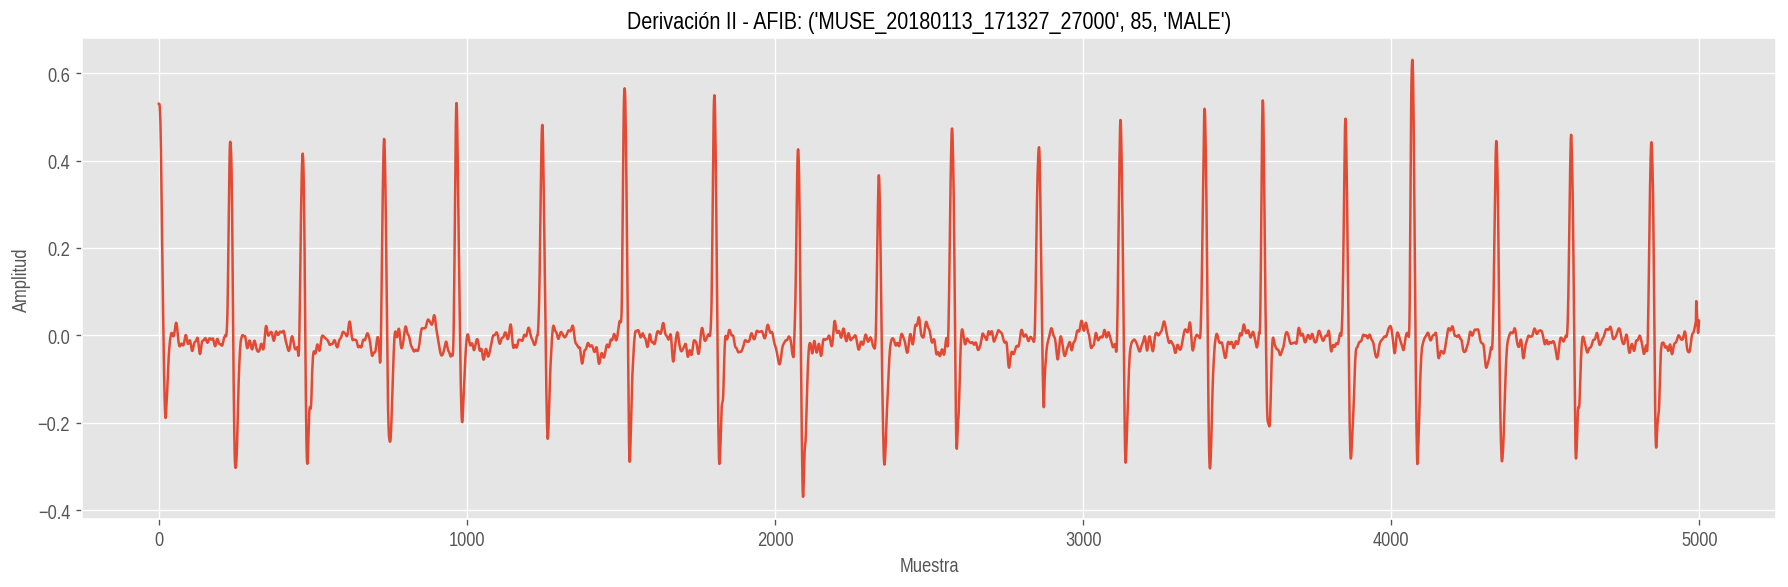

Señal Cruda:


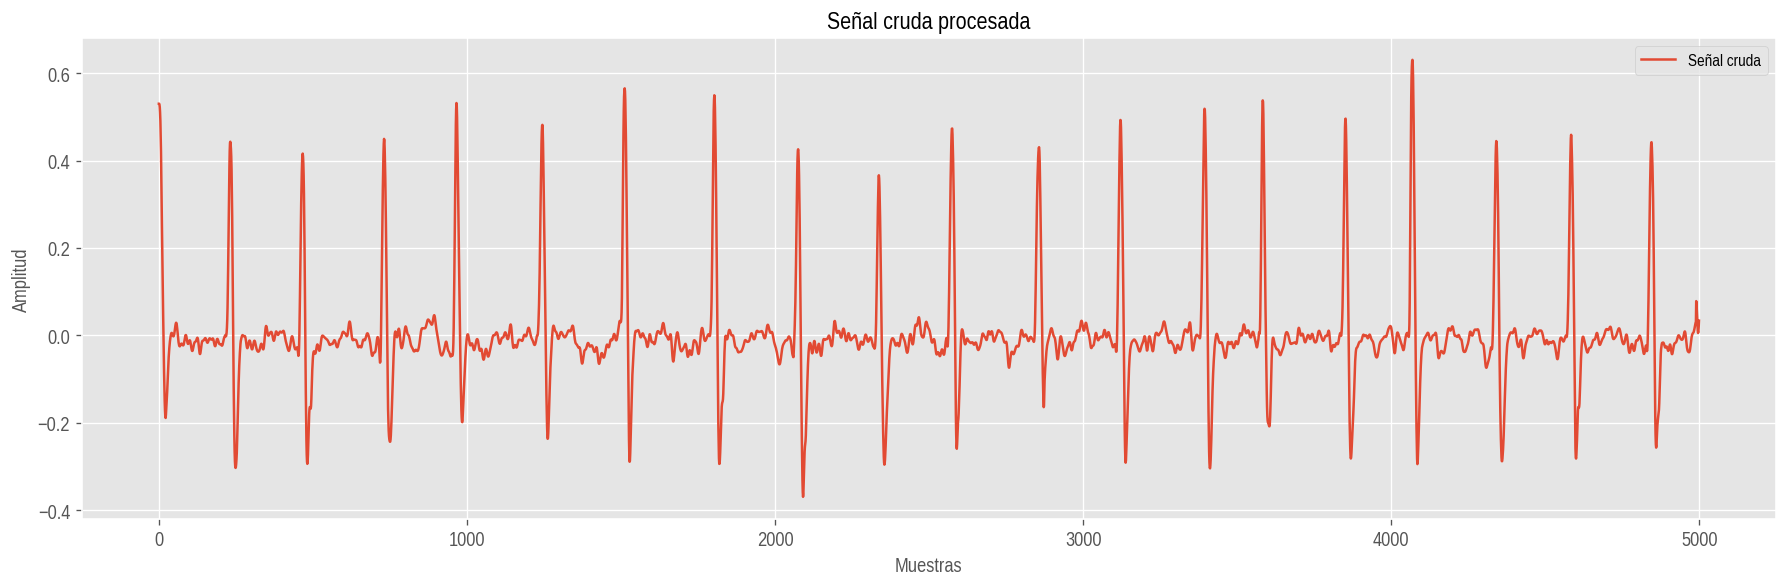


Señal Limpia por ecg_process:


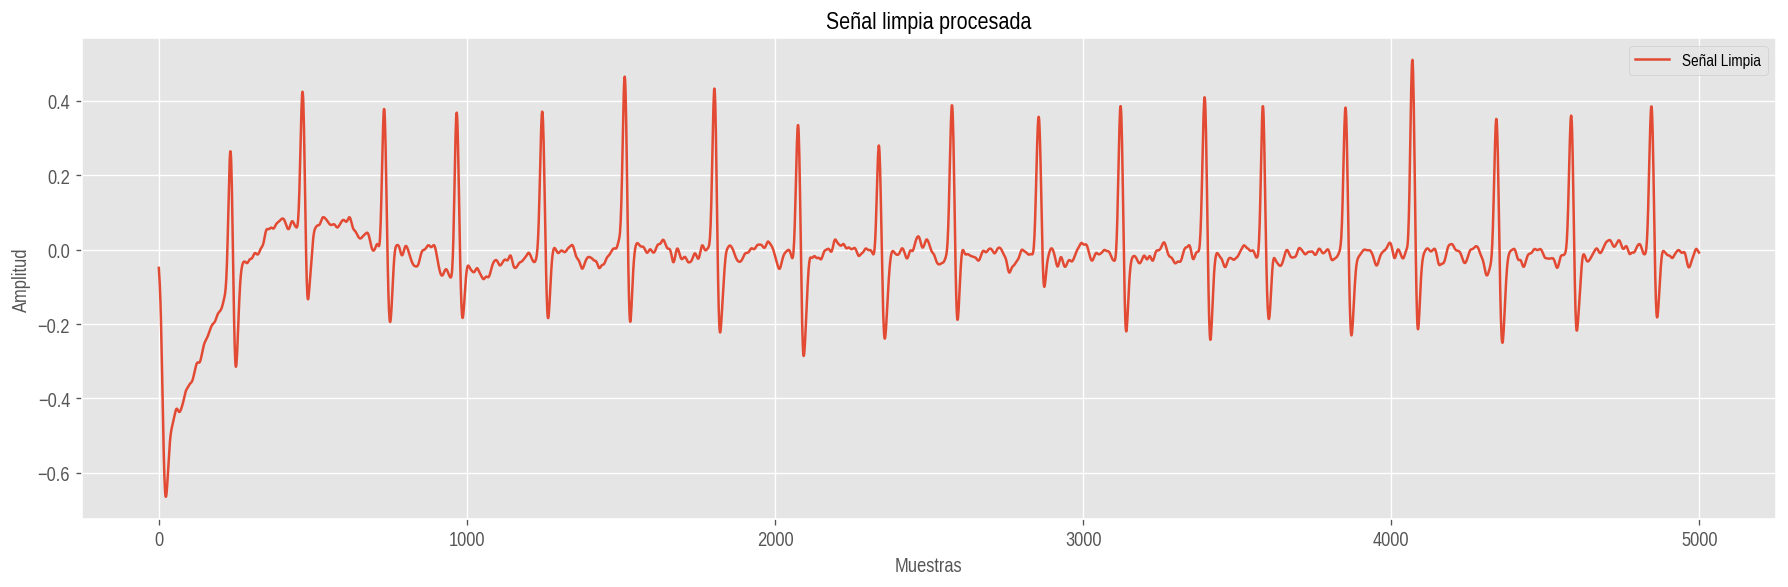


Frecuencia Cardíaca (lpm):
117.37150528793924

Índices de los Picos R:
[ 232  466  731  967 1244 1512 1803 2075 2337 2574 2848 3122 3394 3610
 3826 4069 4341 4584 4845]

Intervalos RR (s):
[0.468 0.53  0.472 0.554 0.536 0.582 0.544 0.524 0.474 0.548 0.548 0.544
 0.432 0.432 0.486 0.544 0.486 0.522]

Visualización de la señal procesada con los picos R detectados:


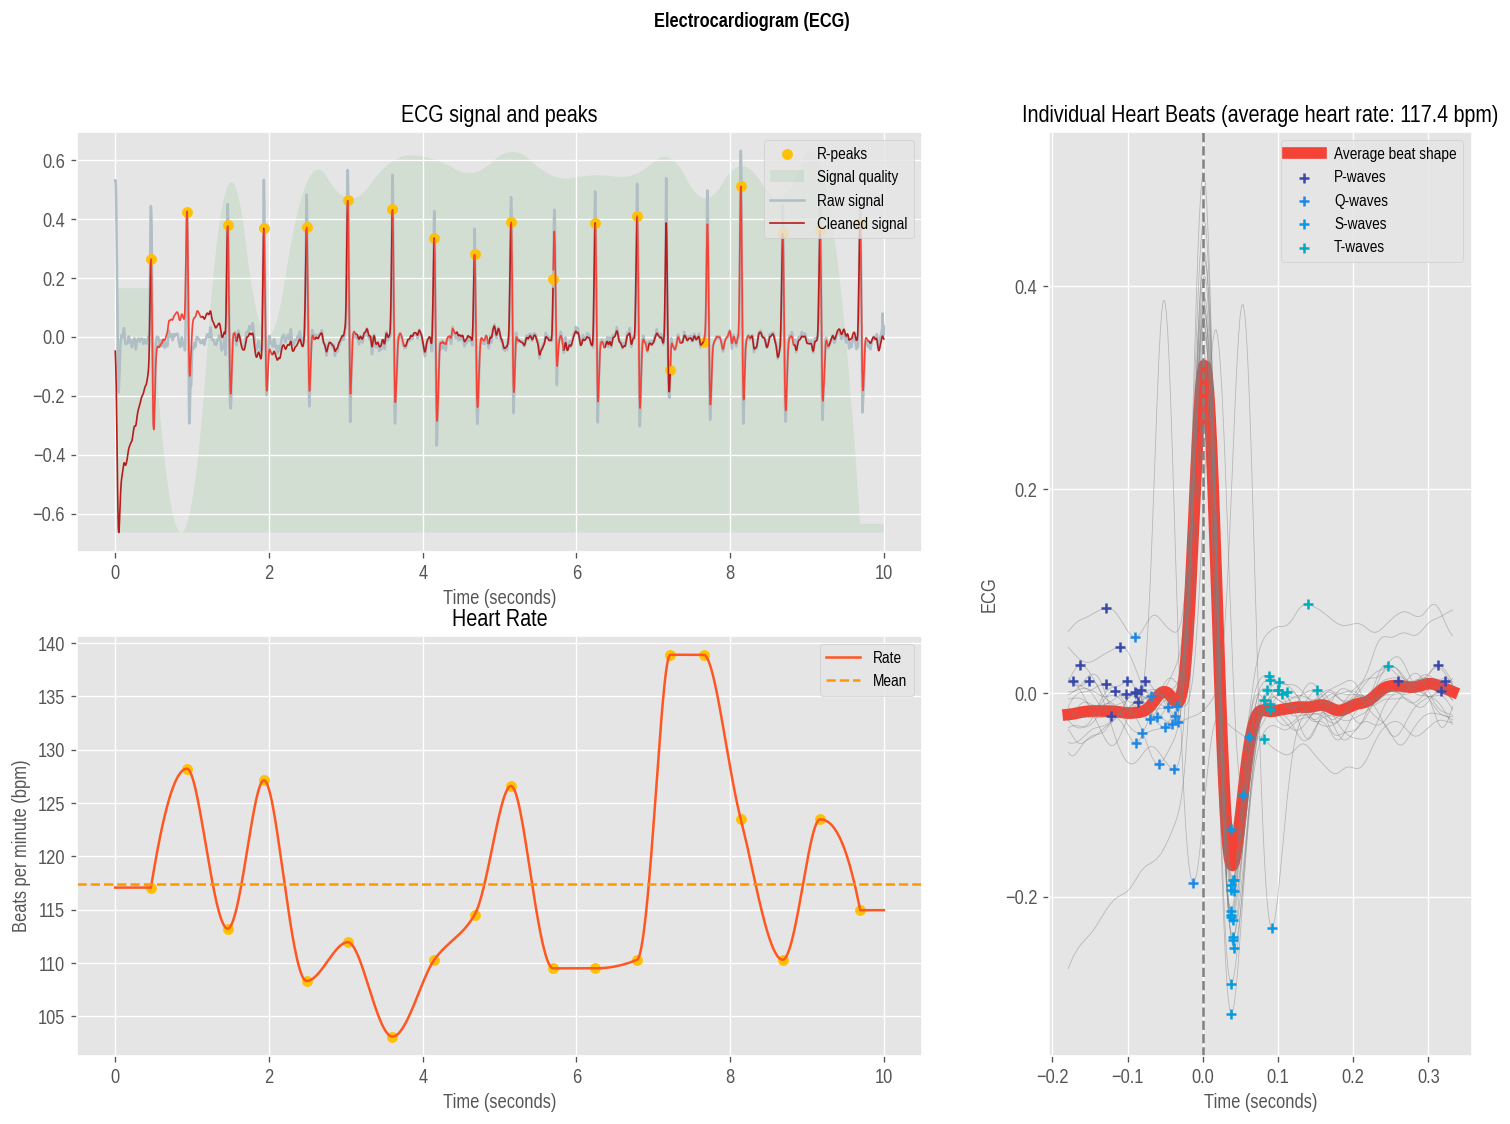

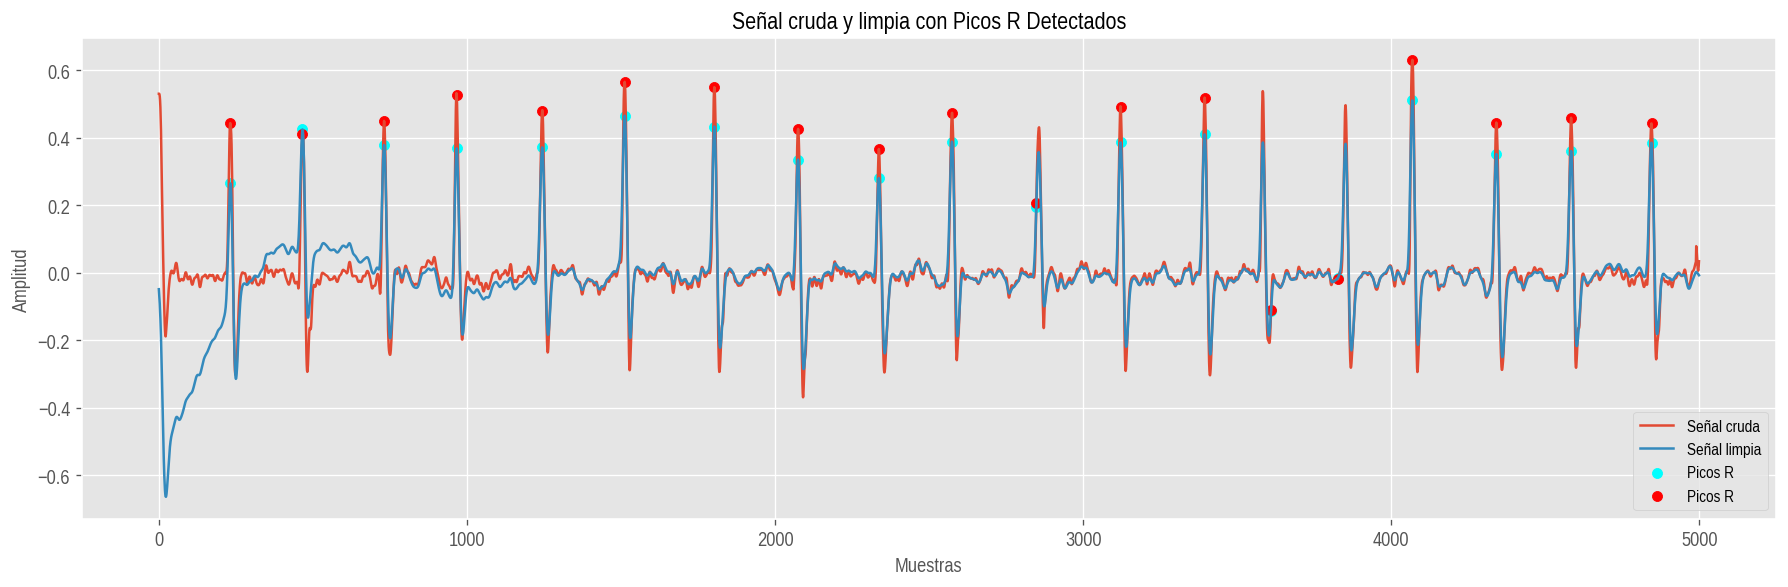

In [6]:
# Importar bibliotecas necesarias
import os
import pandas as pd
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

# Función para procesar y graficar señales ECG usando ecg_process
def Procesar_ECGProcess(directorios, tipo):
    for directorio in directorios[:1]:  # Puedes ajustar el número de archivos a observar
        csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/', directorio[0] + '.csv')  # Construye la ruta al archivo .csv

        try:
            derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])  # Lee el archivo .csv
            ecg_signal = pd.to_numeric(derivaciones['II'].values, errors='coerce')
            sampling_rate = 500  # Frecuencia de muestreo en Hz

            ecg_signal = normalizacion(ecg_signal)

            # Grafica la columna II
            plt.figure(figsize=(15, 5))
            plt.plot(ecg_signal)
            plt.title(f'Derivación II - {tipo}: {directorio}')
            plt.xlabel('Muestra')
            plt.ylabel('Amplitud')
            plt.show()

            # Procesamiento de la señal ECG
            ecg_df, ecg_info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate)

            # Exploración de la señal procesada
            raw_signal = ecg_df['ECG_Raw']         # Señal cruda
            clean_signal = ecg_df['ECG_Clean']     # Señal limpia
            heart_rate = ecg_df['ECG_Rate']        # Frecuencia cardíaca (lpm)
            heart_rate = np.mean(heart_rate)

            # Impresión de los resultados
            print("Señal Cruda:")
            plt.figure(figsize=(15, 5))
            plt.plot(raw_signal, label='Señal cruda')
            plt.title('Señal cruda procesada')
            plt.xlabel('Muestras')
            plt.ylabel('Amplitud')
            plt.legend()
            plt.show()

            print("\nSeñal Limpia por ecg_process:")
            plt.figure(figsize=(15, 5))
            plt.plot(clean_signal, label='Señal Limpia')
            plt.title('Señal limpia procesada')
            plt.xlabel('Muestras')
            plt.ylabel('Amplitud')
            plt.legend()
            plt.show()

            print("\nFrecuencia Cardíaca (lpm):")
            print(heart_rate)

            # Obtener los índices de los picos R
            r_peaks = ecg_info['ECG_R_Peaks']
            print("\nÍndices de los Picos R:")
            print(r_peaks)

            # Calcular los intervalos RR
            r_peaks_times = r_peaks / sampling_rate  # Convertir a tiempo en segundos
            rr_intervals = np.diff(r_peaks_times)    # Diferencias entre picos consecutivos

            print("\nIntervalos RR (s):")
            print(rr_intervals)

            # Visualización de los resultados
            print("\nVisualización de la señal procesada con los picos R detectados:")
            nk.ecg_plot(ecg_df, info=ecg_info)
            # Para guardar la figura generada en un archivo
            fig = plt.gcf()  # Obtiene la figura actual
            fig.set_size_inches(15, 10, forward=True)  # Ajusta el tamaño de la figura

            # Visualización manual de la señal limpia con los picos R
            plt.figure(figsize=(15, 5))
            plt.plot(raw_signal, label='Señal cruda')
            plt.plot(clean_signal, label='Señal limpia')
            plt.scatter(r_peaks, clean_signal[r_peaks.astype(int)], color='cyan', label='Picos R')
            plt.scatter(r_peaks, raw_signal[r_peaks.astype(int)], color='red', label='Picos R')
            plt.title('Señal cruda y limpia con Picos R Detectados')
            plt.xlabel('Muestras')
            plt.ylabel('Amplitud')
            plt.legend()
            plt.show()

        except FileNotFoundError:
            print(f"Archivo no encontrado: {csv_ruta}")

# Graficar para ambos tipos de datos
print("ECG_process con archivo SB:")
Procesar_ECGProcess(directoriosSB, 'SB')
print("ECG_process con archivo AFIB:")
Procesar_ECGProcess(directoriosAFIB, 'AFIB')


Dado que la señal obtenida, ya se encuentra filtrada por los autores, se puede dar uso al modulo ecg_peaks, con el cuál podríamos obtener la información de los picos sin necesidad de realizar una nueva limpieza, en especial ya que como se observa anteriormente, esta genera nuevas distorsiones de la señal.

Por ello, se decide usar unicamente el metodo de busqueda de picos, pero probando diferentes algoritmos.

Comparación de métodos NeuroKit para archivo SB:


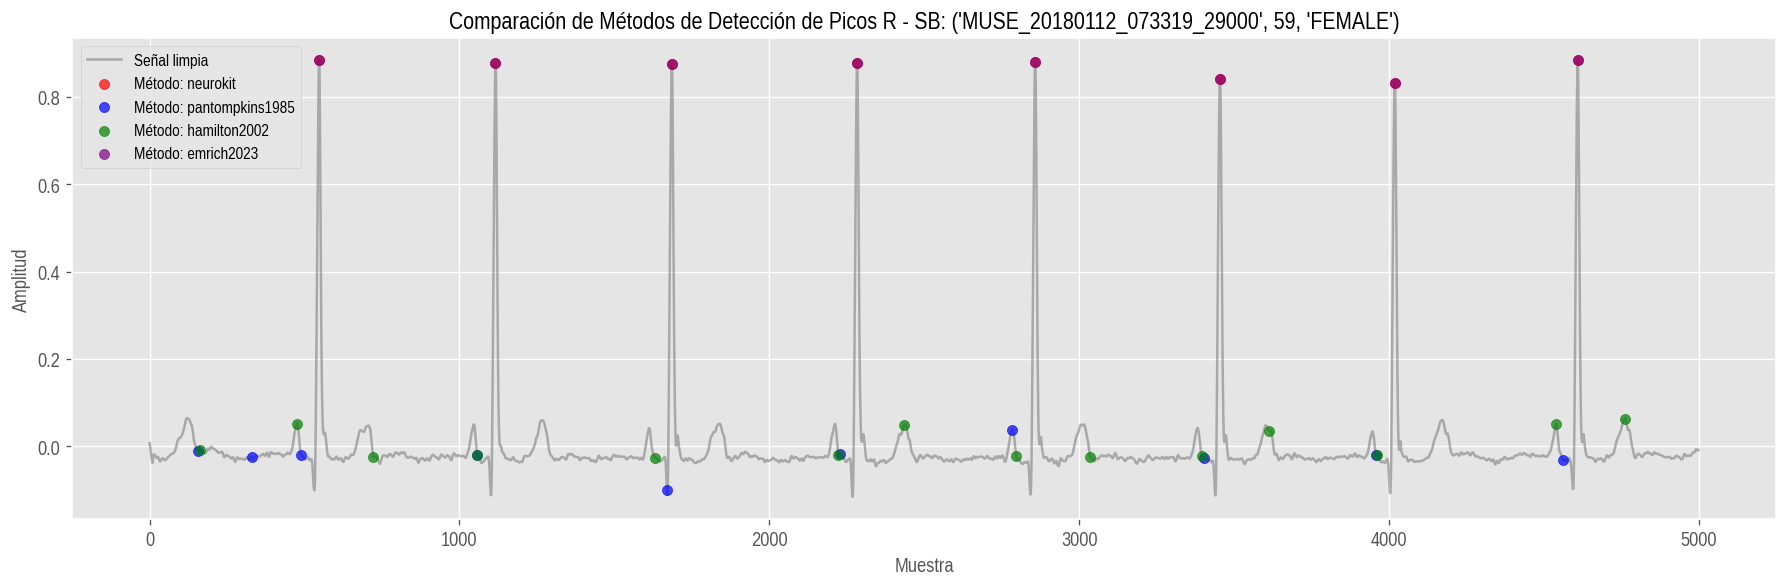

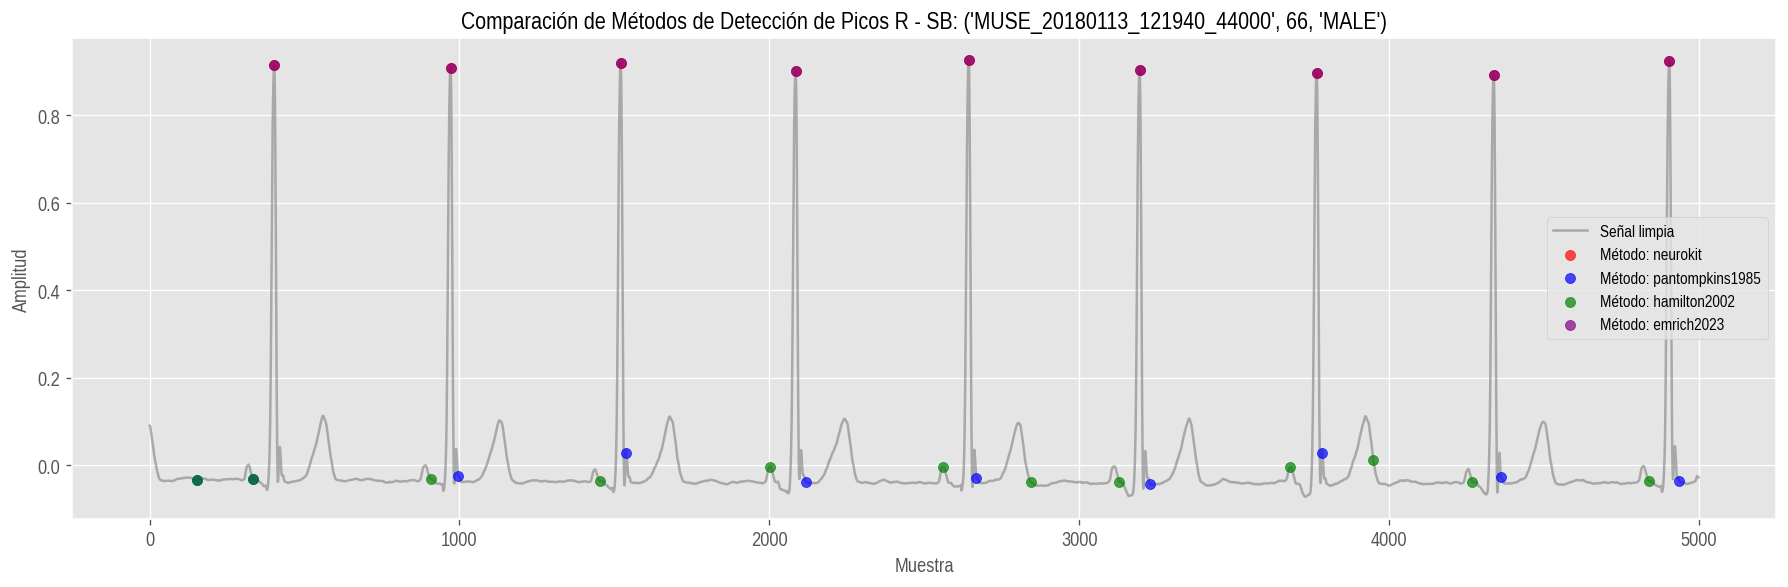

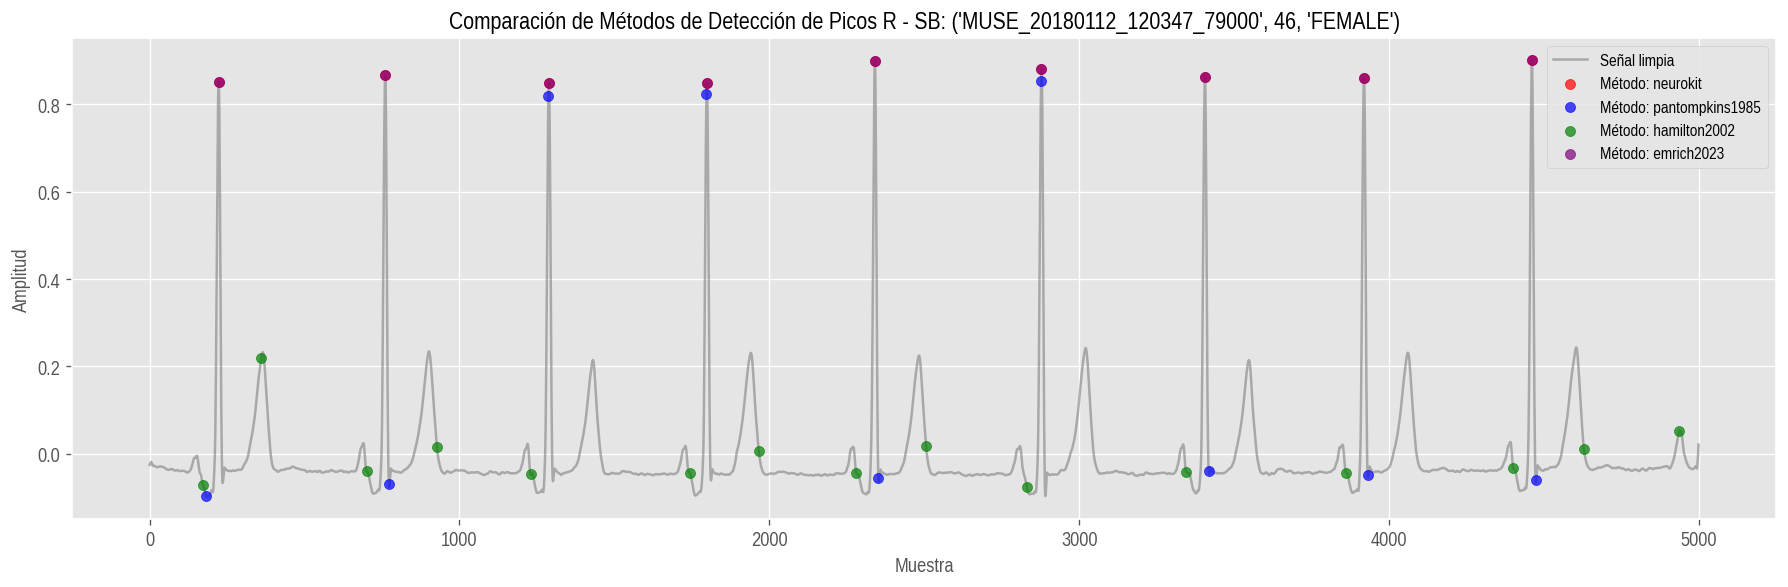

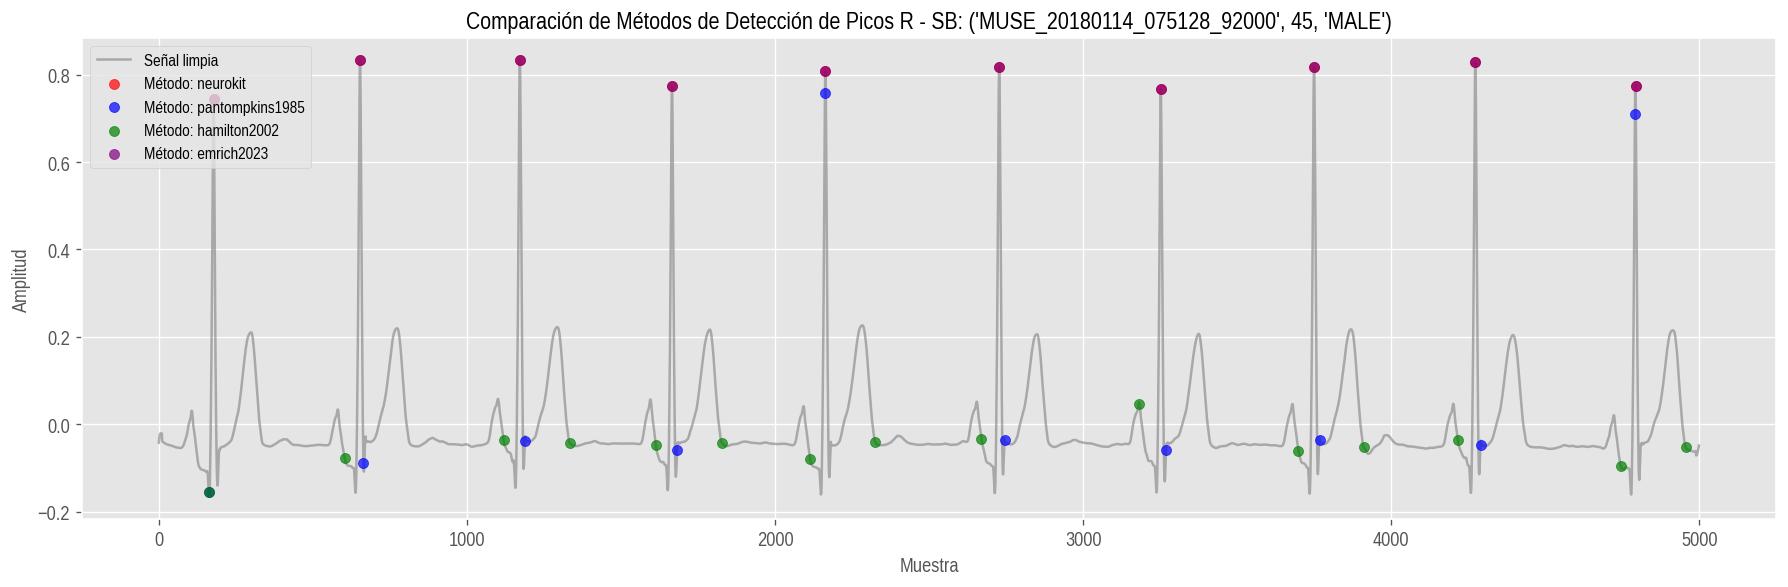

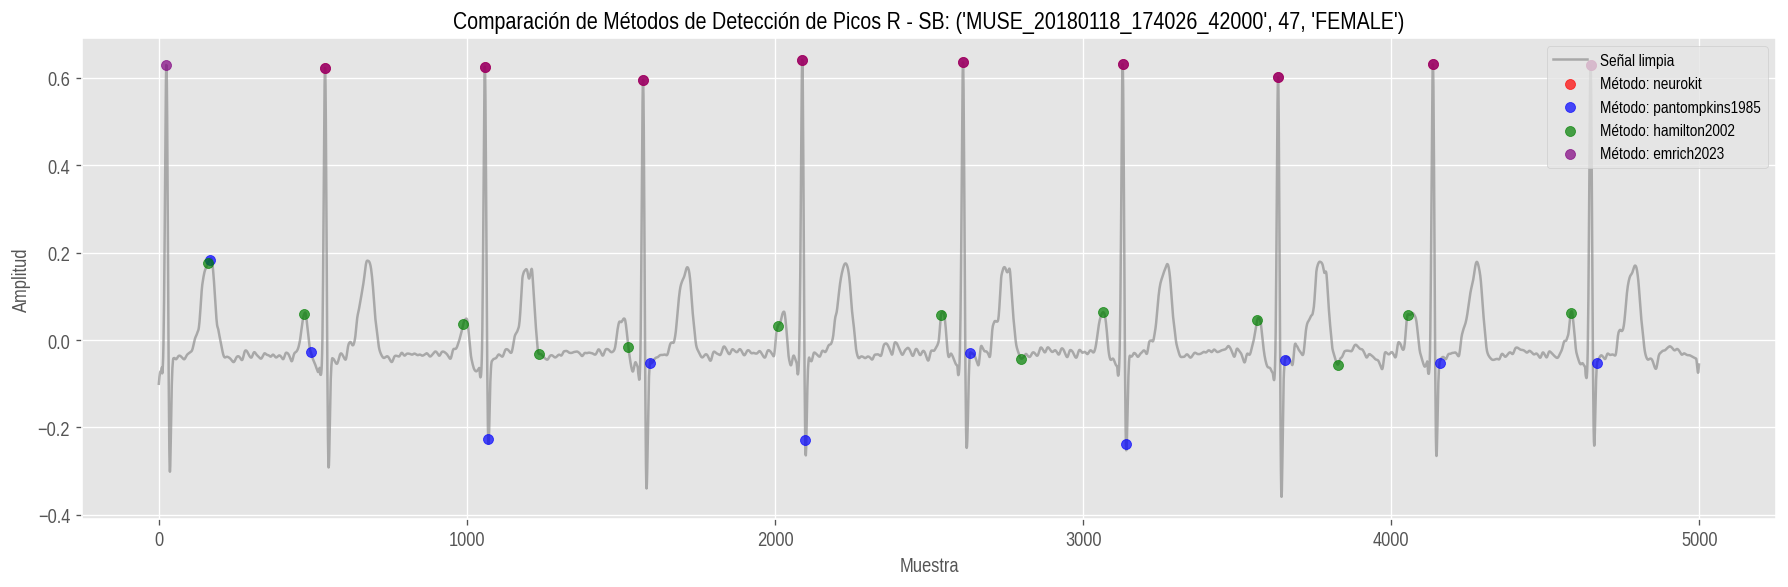

Comparación de métodos NeuroKit para archivo AFIB:


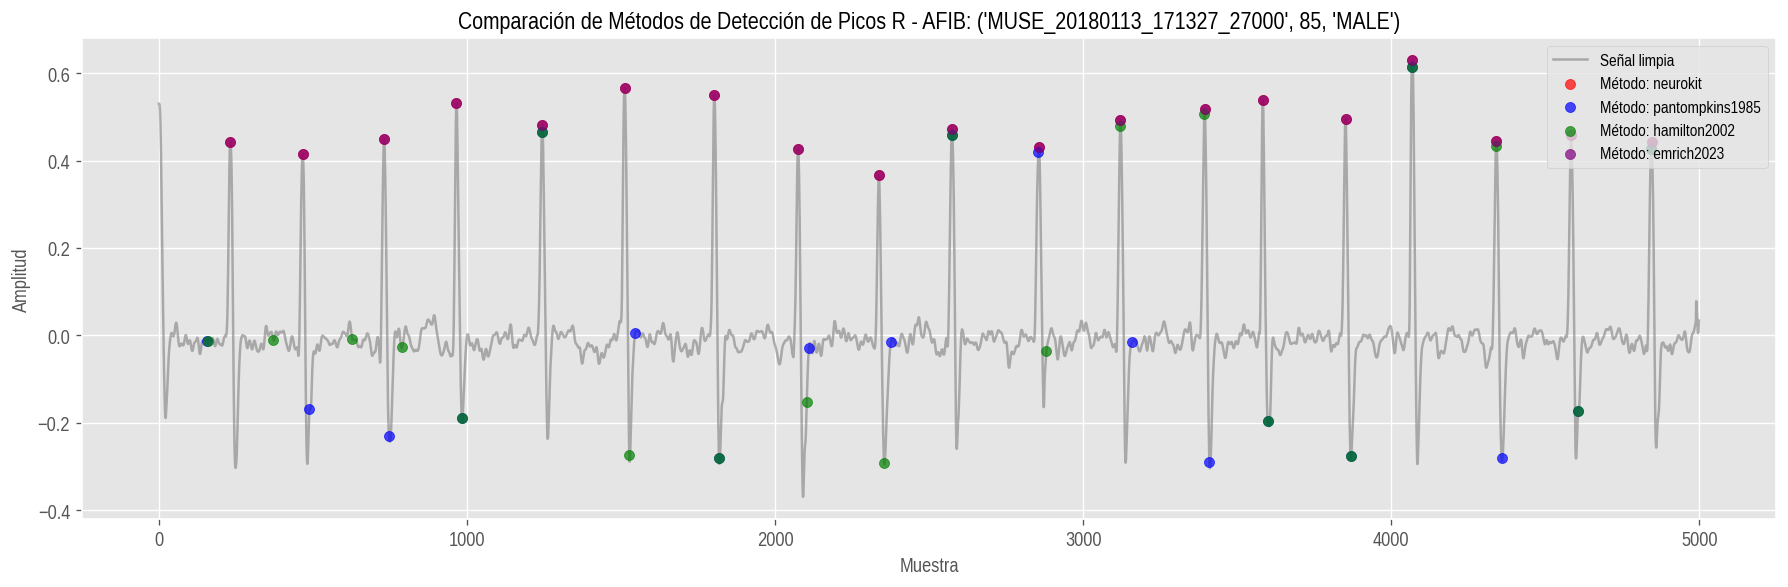

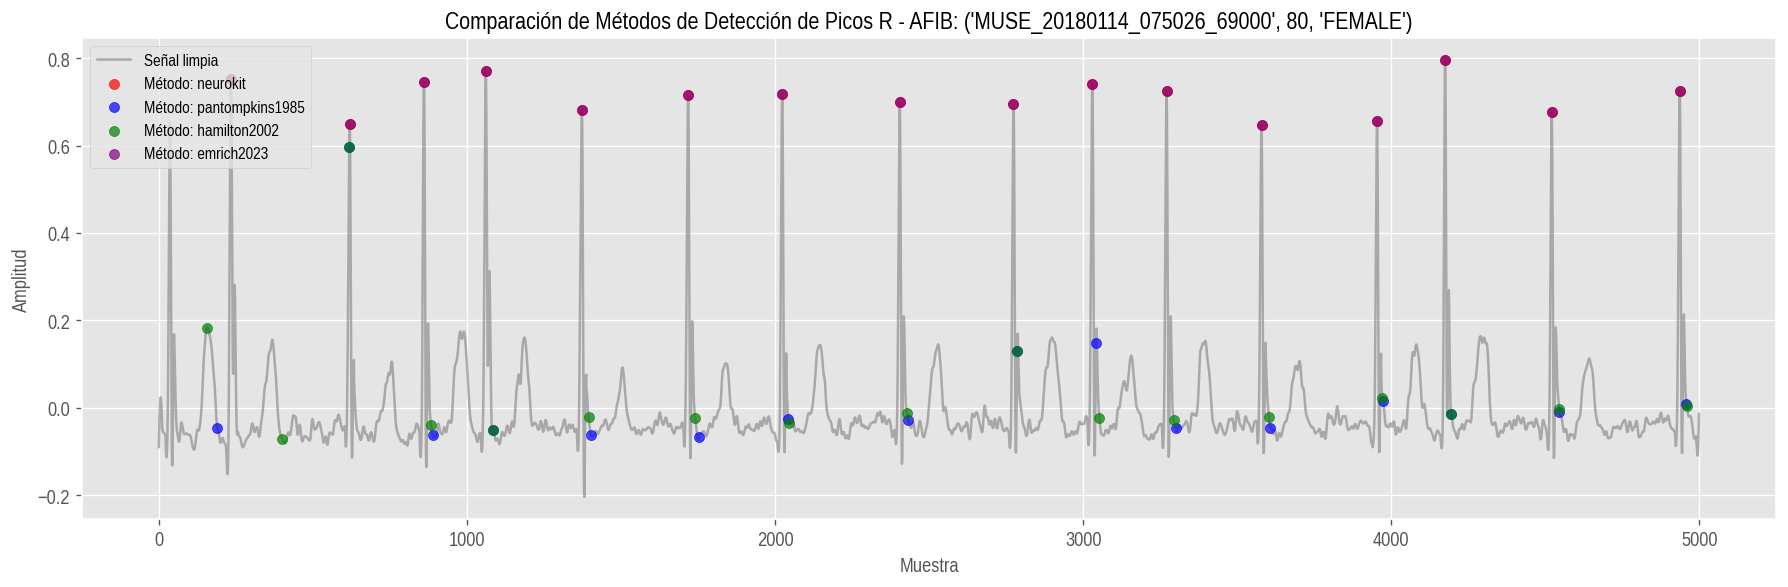

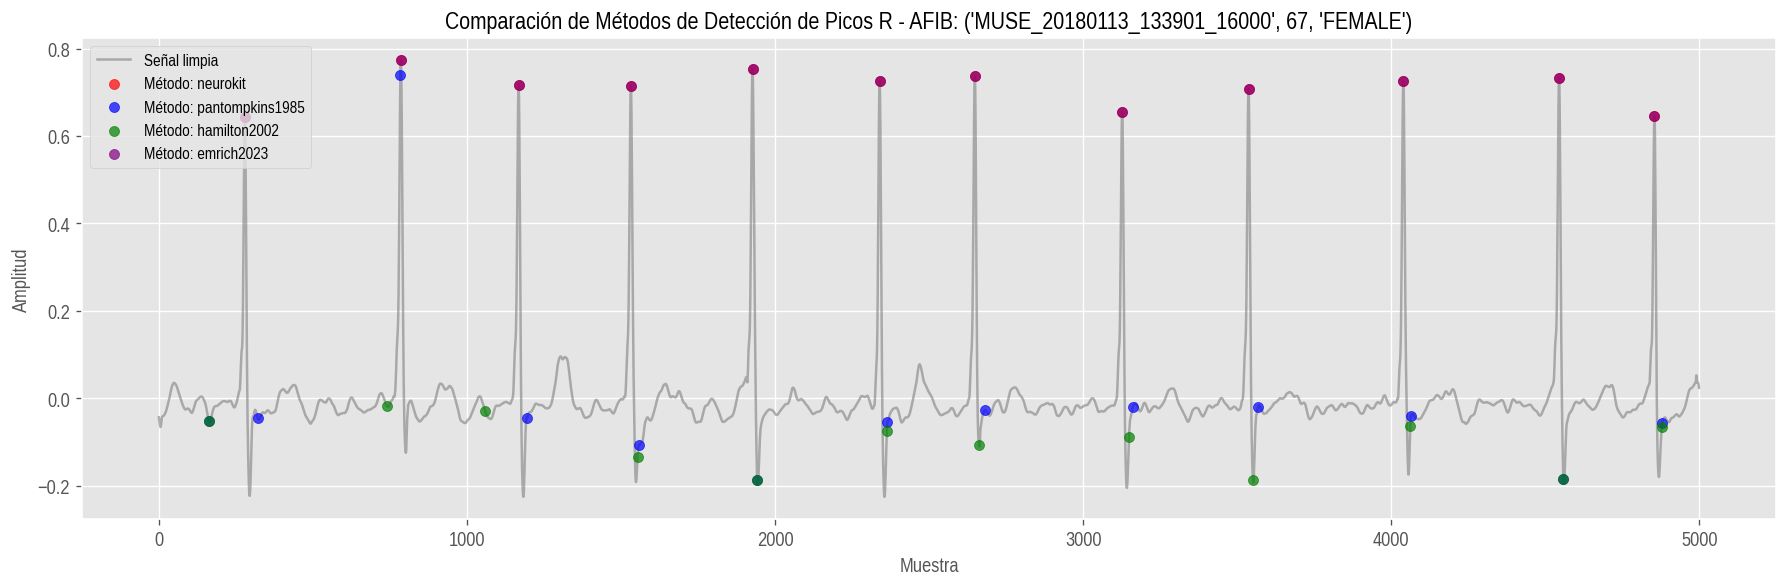

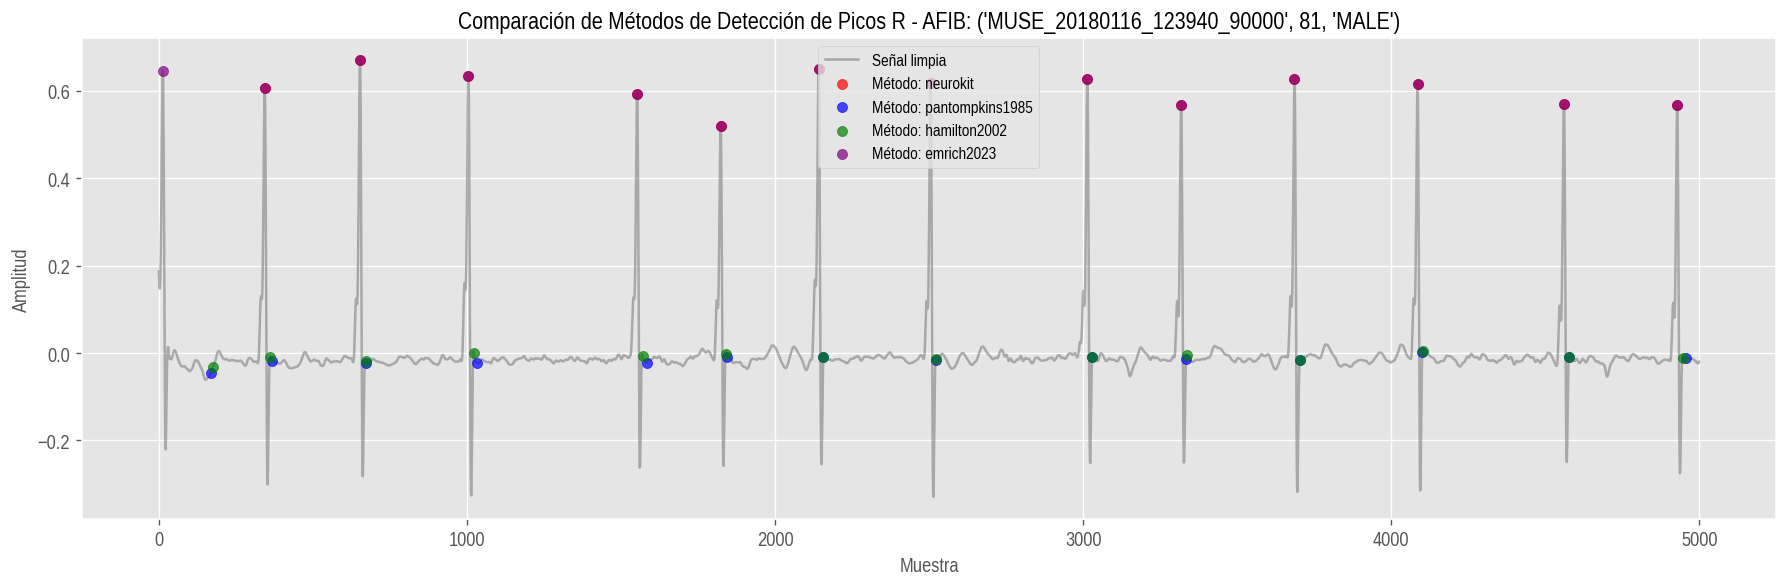

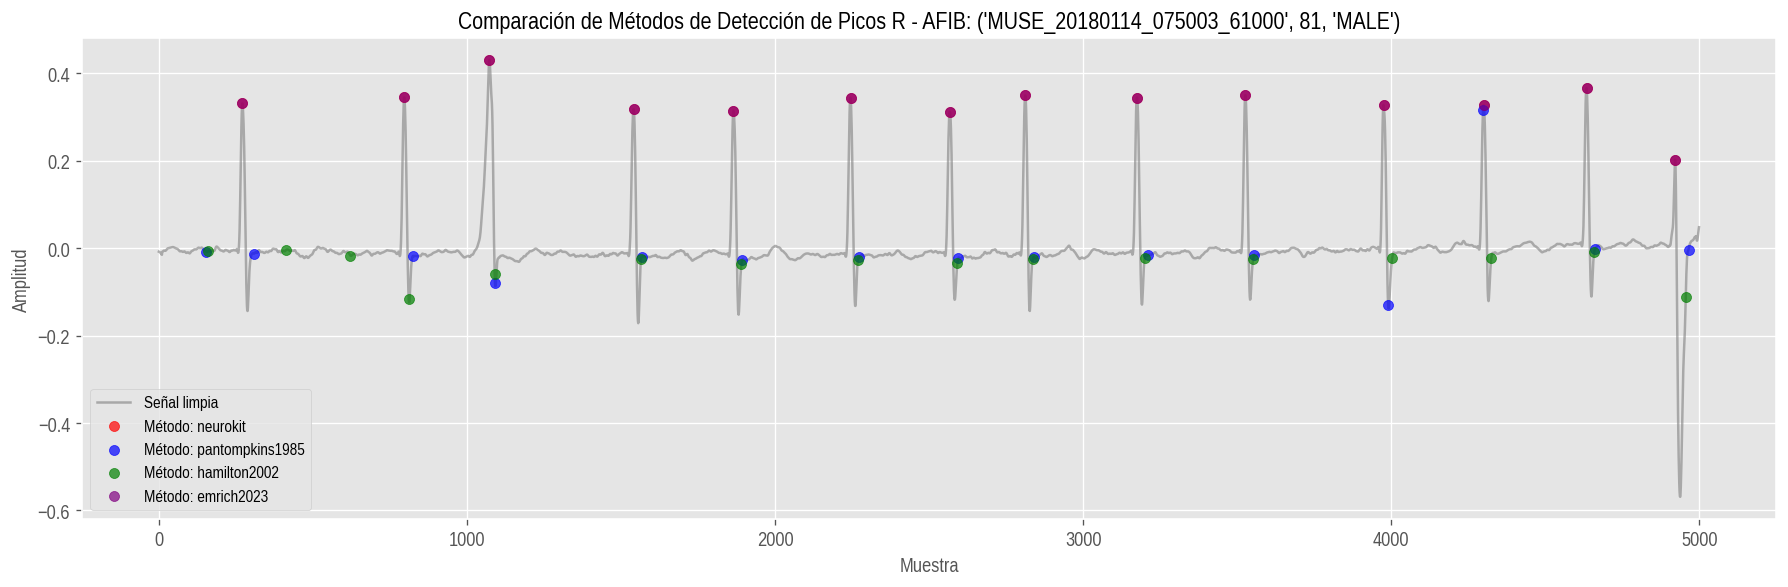

In [7]:
# Importar bibliotecas necesarias
import os
import pandas as pd
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

# Función para comparar diferentes métodos de detección de picos R
def CompararMetodosNeuroKit(directorios, tipo):
    for directorio in directorios[:5]:  # Puedes ajustar el número de archivos a observar
        csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/', directorio[0] + '.csv')  # Construye la ruta al archivo .csv

        try:
            # Leer la señal desde el archivo CSV
            derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
            ecg_signal = pd.to_numeric(derivaciones['II'].values, errors='coerce')
            sampling_rate = 500  # Frecuencia de muestreo en Hz

            ecg_signal = normalizacion(ecg_signal)

            # Detectar picos R con diferentes métodos usando NeuroKit2
            methods = ["neurokit", "pantompkins1985", "hamilton2002", "emrich2023"]#, "promac"]
            peaks_dict = {}  # Diccionario para almacenar resultados

            for method in methods:
                _, peaks_info = nk.ecg_peaks(ecg_signal, sampling_rate=sampling_rate, method=method)
                peaks_dict[method] = peaks_info["ECG_R_Peaks"]

            # Graficar la señal y los picos detectados
            plt.figure(figsize=(15, 5))
            plt.plot(ecg_signal, label='Señal limpia', color='gray', alpha=0.6)

            # Agregar los picos detectados por cada método
            colors = ["red", "blue", "green", "purple"]
            for method, color in zip(methods, colors):
                plt.scatter(peaks_dict[method], ecg_signal[peaks_dict[method]], color=color, label=f'Método: {method}', zorder=3, alpha = 0.7)

            # Configuración de la gráfica
            plt.title(f'Comparación de Métodos de Detección de Picos R - {tipo}: {directorio}')
            plt.xlabel('Muestra')
            plt.ylabel('Amplitud')
            plt.legend()
            plt.show()

        except FileNotFoundError:
            print(f"Archivo no encontrado: {csv_ruta}")

# Comparar métodos para ambos tipos de datos
print("Comparación de métodos NeuroKit para archivo SB:")
CompararMetodosNeuroKit(directoriosSB, 'SB')
print("Comparación de métodos NeuroKit para archivo AFIB:")
CompararMetodosNeuroKit(directoriosAFIB, 'AFIB')


Como se puede observar, para realizar la identificación de picos, el método NeuroKit resulta ser el más eficiente y más exacto al momento de seleccionar picos R, seguido por el emrich2023, cuya única razón de no ser seleccionado es por la presencia de falsos positivos que presentó.

## Quinta parte:

Selección de características:

In [8]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft

> 1 & 2: PatientAge and Gender: Obtenidas desde el Diagnostics.xlsx

Justificación:

> 3: fMP

Justificación:

In [9]:
def fMP(registro):
    # Ruta de la carpeta donde se encuentran los archivos CSV de ECG
    csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/', registro[0] + '.csv')  # Construye la ruta al archivo .csv

    try:
        # Leer la señal desde el archivo CSV
        derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        ecg_signal = pd.to_numeric(derivaciones['II'].values, errors='coerce')
        sampling_rate = 500  # Frecuencia de muestreo en Hz

        ecg_signal = normalizacion(ecg_signal)

        # Encontrar la frecuencia de máxima potencia usando FFT
        fs = 500  # Frecuencia de muestreo en Hz
        X = fft(ecg_signal)  # Aplicar la FFT a la señal
        freqs = np.fft.fftfreq(len(ecg_signal), 1/fs)  # Generar las frecuencias
        fMP = np.floor(freqs[np.argmax(np.abs(X))])  # Obtener la frecuencia con la máxima amplitud

        # Devolver la frecuencia de máxima potencia
        return fMP

    except FileNotFoundError:
            print(f"Archivo no encontrado: {csv_ruta}")
            return None

    except RuntimeWarning as e:
        print(f"Advertencia de ejecución para {csv_ruta}: {e}")
        return None

    except Exception as e:
        print(f"Error inesperado procesando {csv_ruta}: {e}")
        return None

> 4: Ventricular Rate (BPM)

Justificacion:

In [10]:
# Función para calcular la frecuencia ventricular (Ventricular Rate)
def ventricular_rate(registro):
    csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/', registro[0] + '.csv')

    try:
        derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        ecg_signal = pd.to_numeric(derivaciones['II'].values, errors='coerce')
        ecg_signal = normalizacion(ecg_signal)

        # Detectar los picos R
        sampling_rate = 500  # Frecuencia de muestreo en Hz
        _, peaks_info = nk.ecg_peaks(ecg_signal, sampling_rate=sampling_rate)
        r_peaks = peaks_info['ECG_R_Peaks']

        # Omitir valores NaN o no válidos en r_peaks
        r_peaks = r_peaks[~np.isnan(r_peaks)]

        # Verificar que r_peaks no está vacío antes de calcular
        if len(r_peaks) > 1:  # Necesitamos al menos 2 valores para calcular diferencias
            # Calcular el Ventricular Rate (BPM)
            rr_intervals = np.diff(r_peaks) / sampling_rate  # Intervalos RR en segundos
            hr = 60 / rr_intervals  # Frecuencia en BPM
            ventricular_rate = np.floor(np.mean(hr))
        else:
            print(f"Datos insuficientes para calcular en {csv_ruta}")
            return None

        return ventricular_rate
    except FileNotFoundError:
        print(f"Archivo no encontrado: {csv_ruta}")
        return None

    except RuntimeWarning as e:
        print(f"Advertencia de ejecución para {csv_ruta}: {e}")
        return None

    except Exception as e:
        print(f"Error inesperado procesando {csv_ruta}: {e}")
        return None

> 5: QRT count

Justificacion:

In [11]:
# Función para calcular el QRS Count
def qrs_count(registro):
    csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/', registro[0] + '.csv')

    try:
        derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        ecg_signal = pd.to_numeric(derivaciones['II'].values, errors='coerce')
        ecg_signal = normalizacion(ecg_signal)

        # Detectar los picos R
        sampling_rate = 500  # Frecuencia de muestreo en Hz
        _, peaks_info = nk.ecg_peaks(ecg_signal, sampling_rate=sampling_rate)
        r_peaks = peaks_info['ECG_R_Peaks']

        # Omitir valores NaN o no válidos en r_peaks
        r_peaks = r_peaks[~np.isnan(r_peaks)]

        # Verificar que r_peaks no está vacío antes de calcular
        if len(r_peaks) > 1:  # Necesitamos al menos 2 valores para calcular diferencias
            # Contar los picos QRS
            qrs_count = len(r_peaks)
            return qrs_count
        else:
            print(f"Datos insuficientes para calcular en {csv_ruta}")
            return None

    except FileNotFoundError:
        print(f"Archivo no encontrado: {csv_ruta}")
        return None

    except RuntimeWarning as e:
        print(f"Advertencia de ejecución para {csv_ruta}: {e}")
        return None

    except Exception as e:
        print(f"Error inesperado procesando {csv_ruta}: {e}")
        return None

> 6: HRV

Justificacion:

In [12]:
# Función para calcular la variabilidad de la frecuencia cardíaca (HRV)
def hrv(registro):
    csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/', registro[0] + '.csv')

    try:
        derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        ecg_signal = pd.to_numeric(derivaciones['II'].values, errors='coerce')
        ecg_signal = normalizacion(ecg_signal)

        # Detectar los picos R
        sampling_rate = 500  # Frecuencia de muestreo en Hz
        _, peaks_info = nk.ecg_peaks(ecg_signal, sampling_rate=sampling_rate)
        r_peaks = peaks_info['ECG_R_Peaks']

        # Omitir valores NaN o no válidos en r_peaks
        r_peaks = r_peaks[~np.isnan(r_peaks)]

        # Verificar que r_peaks no está vacío antes de calcular
        if len(r_peaks) > 1:  # Necesitamos al menos 2 valores para calcular diferencias
            # Calcular los intervalos RR y su desviación estándar (HRV)
            rr_intervals = np.diff(r_peaks) / sampling_rate*1000
            hrv = np.floor(np.std(rr_intervals))
        else:
            print(f"Datos insuficientes para calcular en {csv_ruta}")
            return None

        return hrv
    except FileNotFoundError:
        print(f"Archivo no encontrado: {csv_ruta}")
        return None

    except RuntimeWarning as e:
        print(f"Advertencia de ejecución para {csv_ruta}: {e}")
        return None

    except Exception as e:
        print(f"Error inesperado procesando {csv_ruta}: {e}")
        return None

7: RR Interval Mean (ms)

Justificación:

In [13]:
# Función para calcular el RR Interval Mean
def rr_interval_mean(registro):
    csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/', registro[0] + '.csv')

    try:
        derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        ecg_signal = pd.to_numeric(derivaciones['II'].values, errors='coerce')
        ecg_signal = normalizacion(ecg_signal)

        # Detectar los picos R
        sampling_rate = 500  # Frecuencia de muestreo en Hz
        _, peaks_info = nk.ecg_peaks(ecg_signal, sampling_rate=sampling_rate)
        r_peaks = peaks_info['ECG_R_Peaks']

        # Omitir valores NaN o no válidos en r_peaks
        r_peaks = r_peaks[~np.isnan(r_peaks)]

        # Verificar que r_peaks no está vacío antes de calcular
        if len(r_peaks) > 1:  # Necesitamos al menos 2 valores para calcular diferencias
            # Calcular los intervalos RR y su media
            rr_intervals = np.diff(r_peaks) / sampling_rate*1000
            rr_mean = np.floor(np.mean(rr_intervals))

        else:
            print(f"Datos insuficientes para calcular en {csv_ruta}")
            return None

        return rr_mean
    except FileNotFoundError:
        print(f"Archivo no encontrado: {csv_ruta}")
        return None

    except RuntimeWarning as e:
        print(f"Advertencia de ejecución para {csv_ruta}: {e}")
        return None

    except Exception as e:
        print(f"Error inesperado procesando {csv_ruta}: {e}")
        return None

> 8: RR Interval Variance

Justificación:

In [14]:
# Función para calcular la RR Interval Variance
def rr_interval_variance(registro):
    csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/', registro[0] + '.csv')

    try:
        derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        ecg_signal = pd.to_numeric(derivaciones['II'].values, errors='coerce')
        ecg_signal = normalizacion(ecg_signal)

        # Detectar los picos R
        sampling_rate = 500  # Frecuencia de muestreo en Hz
        _, peaks_info = nk.ecg_peaks(ecg_signal, sampling_rate=sampling_rate)
        r_peaks = peaks_info['ECG_R_Peaks']

        # Omitir valores NaN o no válidos en r_peaks
        r_peaks = r_peaks[~np.isnan(r_peaks)]

        # Verificar que r_peaks no está vacío antes de calcular
        if len(r_peaks) > 1:  # Necesitamos al menos 2 valores para calcular diferencias
            # Calcular los intervalos RR y su varianza
            rr_intervals = np.diff(r_peaks) / sampling_rate*1000
            rr_variance = np.floor(np.var(rr_intervals))

        else:
            print(f"Datos insuficientes para calcular en {csv_ruta}")
            return None

        return rr_variance
    except FileNotFoundError:
        print(f"Archivo no encontrado: {csv_ruta}")
        return None

    except RuntimeWarning as e:
        print(f"Advertencia de ejecución para {csv_ruta}: {e}")
        return None

    except Exception as e:
        print(f"Error inesperado procesando {csv_ruta}: {e}")
        return None

## Sexta parte:

Crear una rutina que aplique sobre todos los archivos de la base de datos las rutinas anteriores y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y las características.

| Registro | Estado | CR1 | ... | CRN |
|----------|--------|-----|-----|-----|
|----------|--------|-----|-----|-----|
|----------|--------|-----|-----|-----|

In [15]:
def create_dataframe(directoriosSB, directoriosAFIB):
    data = []
    for directorio in directoriosSB:
        try:
            registro = directorio[0]
            estado = 'SB'  # Tipo de patología
            edad = directorio[1]
            genero = directorio[2]
            fmp = fMP(directorio)
            ventricular_rate_val = ventricular_rate(directorio)
            qrs_count_val = qrs_count(directorio)
            hrv_val = hrv(directorio)
            rr_interval_mean_val = rr_interval_mean(directorio)
            rr_interval_variance_val = rr_interval_variance(directorio)

            data.append([registro, estado, edad, genero, fmp, ventricular_rate_val, qrs_count_val, hrv_val, rr_interval_mean_val, rr_interval_variance_val])

        except Exception as e:
            print(f"Error procesando {directorio}: {e}")
        except RuntimeWarning as e:
            print(f"Advertencia de ejecución para {directorio}: {e}")
            return None

    for directorio in directoriosAFIB:
        try:
            registro = directorio[0]
            estado = 'AFIB'
            edad = directorio[1]
            genero = directorio[2]
            fmp = fMP(directorio)
            ventricular_rate_val = ventricular_rate(directorio)
            qrs_count_val = qrs_count(directorio)
            hrv_val = hrv(directorio)
            rr_interval_mean_val = rr_interval_mean(directorio)
            rr_interval_variance_val = rr_interval_variance(directorio)

            data.append([registro, estado, edad, genero, fmp, ventricular_rate_val, qrs_count_val, hrv_val, rr_interval_mean_val, rr_interval_variance_val])

        except Exception as e:
            print(f"Error procesando {directorio}: {e}")
        except RuntimeWarning as e:
            print(f"Advertencia de ejecución para {directorio}: {e}")
            return None

    df = pd.DataFrame(data, columns=['Registro', 'Estado', 'Edad', 'Género', 'fMP', 'Ventricular Rate', 'QRS Count', 'HRV', 'RR Interval Mean', 'RR Interval Variance'])
    return df

In [16]:
df = create_dataframe(directoriosSB, directoriosAFIB)
display(df)

Datos insuficientes para calcular en /content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/MUSE_20180116_131253_72000.csv
Datos insuficientes para calcular en /content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/MUSE_20180116_131253_72000.csv
Datos insuficientes para calcular en /content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/MUSE_20180116_131253_72000.csv
Datos insuficientes para calcular en /content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/MUSE_20180116_131253_72000.csv
Datos insuficientes para calcular en /content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/MUSE_20180116_131253_72000.csv
Datos insuficientes para calcular en /content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/MUSE_20180116_173718_14000.csv
Datos insuficientes para calcular en /content/drive/MyDrive/Colab Notebooks/Proyecto4/ECGDataDenoised/MUSE_20180116_173718_14000.csv
Datos insuficientes para calcular en /content/drive/MyDrive/Colab Not

Registro Estado  Edad  Género  fMP  Ventricular Rate  \
0     MUSE_20180112_073319_29000     SB    59  FEMALE  2.0              51.0   
1     MUSE_20180113_121940_44000     SB    66    MALE  0.0              53.0   
2     MUSE_20180112_120347_79000     SB    46  FEMALE  3.0              56.0   
3     MUSE_20180114_075128_92000     SB    45    MALE  1.0              58.0   
4     MUSE_20180118_174026_42000     SB    47  FEMALE  2.0              58.0   
...                          ...    ...   ...     ...  ...               ...   
5663  MUSE_20180116_120939_86000   AFIB    77  FEMALE  3.0             102.0   
5664  MUSE_20180114_134126_54000   AFIB    70  FEMALE  2.0              84.0   
5665  MUSE_20180115_131040_20000   AFIB    81  FEMALE  3.0              73.0   
5666  MUSE_20180116_170450_55000   AFIB    74    MALE  2.0              87.0   
5667  MUSE_20180115_131524_93000   AFIB    70    MALE  2.0              95.0   

      QRS Count    HRV  RR Interval Mean  RR Interval Variance  
0           8.0   25.0            1160.0                 669.0  
1           9.0   16.0            1125.0                 267.0  
2           9.0   23.0            1059.0                 572.0  
3          10.0   48.0            1025.0                2353.0  
4           9.0   12.0            1027.0                 168.0  
...         ...    ...               ...                   ...  
5663       15.0  146.0             612.0               21383.0  
5664       13.0  101.0             720.0               10250.0  
5665       12.0  187.0             858.0               35236.0  
5666       13.0  137.0             721.0               19001.0  
5667       15.0  100.0             647.0               10070.0  

[5668 rows x 10 columns]

In [17]:
from google.colab import drive
import pandas as pd

# Montar Google Drive (ejecuta solo una vez en cada sesión de Colab)
drive.mount('/content/drive')

# Especifica la ruta de la carpeta de Google Drive
ruta_guardado = '/content/drive/MyDrive/Colab Notebooks/Proyecto4/df_completo_p4.csv'

# Guarda el DataFrame en formato CSV
df.to_csv(ruta_guardado, index=False)

print(f"Archivo guardado en: {ruta_guardado}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo guardado en: /content/drive/MyDrive/Colab Notebooks/Proyecto4/df_completo_p4.csv


Realizamos una revisión del dataframe para asegurar que no hayan valores NaN:

In [60]:
ruta_guardado = '/content/drive/MyDrive/Colab Notebooks/Proyecto4/df_completo_p4.csv'
df_recuperado = pd.read_csv(ruta_guardado)

In [61]:
df_recuperado.count()

Registro                5668
Estado                  5668
Edad                    5668
Género                  5668
fMP                     5668
Ventricular Rate        5666
QRS Count               5666
HRV                     5666
RR Interval Mean        5666
RR Interval Variance    5666
dtype: int64

Encontramos dos filas con datos NaN, por lo tanto estas serán descartadas del dataframe completo:

In [62]:
# Eliminar filas con valores NaN
print("Filas con valores NaN:")
nan_rows = df_recuperado[df_recuperado.isnull().any(axis=1)]
display(nan_rows)

Filas con valores NaN:


Registro Estado  Edad  Género  fMP  Ventricular Rate  \
4589  MUSE_20180116_131253_72000   AFIB    94  FEMALE  0.0               NaN   
5509  MUSE_20180116_173718_14000   AFIB    92    MALE  2.0               NaN   

      QRS Count  HRV  RR Interval Mean  RR Interval Variance  
4589        NaN  NaN               NaN                   NaN  
5509        NaN  NaN               NaN                   NaN

In [63]:
# Eliminar filas con valores NaN
df_completo = df_recuperado.dropna()

# Reordenar los índices
df_completo = df_completo.reset_index(drop=True)

# Mostrar el DataFrame actualizado
display(df_completo)

Registro Estado  Edad  Género  fMP  Ventricular Rate  \
0     MUSE_20180112_073319_29000     SB    59  FEMALE  2.0              51.0   
1     MUSE_20180113_121940_44000     SB    66    MALE  0.0              53.0   
2     MUSE_20180112_120347_79000     SB    46  FEMALE  3.0              56.0   
3     MUSE_20180114_075128_92000     SB    45    MALE  1.0              58.0   
4     MUSE_20180118_174026_42000     SB    47  FEMALE  2.0              58.0   
...                          ...    ...   ...     ...  ...               ...   
5661  MUSE_20180116_120939_86000   AFIB    77  FEMALE  3.0             102.0   
5662  MUSE_20180114_134126_54000   AFIB    70  FEMALE  2.0              84.0   
5663  MUSE_20180115_131040_20000   AFIB    81  FEMALE  3.0              73.0   
5664  MUSE_20180116_170450_55000   AFIB    74    MALE  2.0              87.0   
5665  MUSE_20180115_131524_93000   AFIB    70    MALE  2.0              95.0   

      QRS Count    HRV  RR Interval Mean  RR Interval Variance  
0           8.0   25.0            1160.0                 669.0  
1           9.0   16.0            1125.0                 267.0  
2           9.0   23.0            1059.0                 572.0  
3          10.0   48.0            1025.0                2353.0  
4           9.0   12.0            1027.0                 168.0  
...         ...    ...               ...                   ...  
5661       15.0  146.0             612.0               21383.0  
5662       13.0  101.0             720.0               10250.0  
5663       12.0  187.0             858.0               35236.0  
5664       13.0  137.0             721.0               19001.0  
5665       15.0  100.0             647.0               10070.0  

[5666 rows x 10 columns]

## Septima parte:

En esta sección se debe desarrollar e implementar el código para entrenar y evaluar tres diferentes arquitecturas de redes neuronales con el objetivo de clasificar dos patologías cardíacas.

Para cada modelo, se analizarán los resultados mediante la generación de matrices de confusión, las cuales permitirán evaluar el desempeño en términos de métricas como precisión, sensibilidad, especificidad y F1-score.

Finalmente, se realizará una comparación detallada de las arquitecturas, discutiendo su eficacia y eficiencia para esta tarea, y se identificará la mejor opción en función de los resultados obtenidos.

Primero, tomando el dataframe anterior, debemos realizar las modificaciones necesarias para que los datos puedan usarse en el entrenamiento de las redes.

In [64]:
import pandas as pd
from scipy.stats import zscore

# Aplicar z-score a las columnas numéricas
numerical_columns = df_completo.select_dtypes(include=['float64', 'int64']).columns
df_completo[numerical_columns] = df_completo[numerical_columns].apply(zscore)

# Normalizar 'Género' (FEMALE = 0, MALE = 1)
df_completo['Género'] = df_completo['Género'].map({'FEMALE': 0, 'MALE': 1})

# Normalizar 'Estado' (SB = 0, AFIB = 1)
df_completo['Estado'] = df_completo['Estado'].map({'SB': 0, 'AFIB': 1})

# Mostrar el DataFrame actualizado
display(df_completo)


Registro  Estado      Edad  Género       fMP  \
0     MUSE_20180112_073319_29000       0 -0.272235       0 -0.213560   
1     MUSE_20180113_121940_44000       0  0.198814       1 -0.916045   
2     MUSE_20180112_120347_79000       0 -1.147041       0  0.137683   
3     MUSE_20180114_075128_92000       0 -1.214334       1 -0.564802   
4     MUSE_20180118_174026_42000       0 -1.079748       0 -0.213560   
...                          ...     ...       ...     ...       ...   
5661  MUSE_20180116_120939_86000       1  0.939034       0  0.137683   
5662  MUSE_20180114_134126_54000       1  0.467985       0 -0.213560   
5663  MUSE_20180115_131040_20000       1  1.208205       0  0.137683   
5664  MUSE_20180116_170450_55000       1  0.737156       1 -0.213560   
5665  MUSE_20180115_131524_93000       1  0.467985       1 -0.213560   

      Ventricular Rate  QRS Count       HRV  RR Interval Mean  \
0            -0.734981  -0.799498 -0.617104          0.894934   
1            -0.654642  -0.528064 -0.725856          0.741666   
2            -0.534134  -0.528064 -0.641271          0.452645   
3            -0.453795  -0.256631 -0.339183          0.303755   
4            -0.453795  -0.528064 -0.774190          0.312513   
...                ...        ...       ...               ...   
5661          1.313659   1.100537  0.845002         -1.504816   
5662          0.590610   0.557670  0.301244         -1.031872   
5663          0.148746   0.286236  1.340426         -0.427556   
5664          0.711118   0.557670  0.736250         -1.027493   
5665          1.032473   1.100537  0.289160         -1.351547   

      RR Interval Variance  
0                -0.282833  
1                -0.292275  
2                -0.285111  
3                -0.243279  
4                -0.294600  
...                    ...  
5661              0.203692  
5662             -0.057797  
5663              0.529067  
5664              0.147744  
5665             -0.062025  

[5666 rows x 10 columns]

In [65]:
# Librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import classification_report

# Separar características y etiquetas
caracteristicas = df_completo.drop(columns=['Estado', 'Registro'])
etiquetas = df_completo['Estado']

# Balancear las clases usando submuestreo
datos_balanceados = pd.concat([
    resample(df_completo[df_completo['Estado'] == 0], n_samples=df_completo['Estado'].value_counts().min(), random_state=42, replace=False),
    resample(df_completo[df_completo['Estado'] == 1], n_samples=df_completo['Estado'].value_counts().min(), random_state=42, replace=False)
])

# Separar nuevamente características y etiquetas
caracteristicas_balanceadas = datos_balanceados.drop(columns=['Estado', 'Registro'])
etiquetas_balanceadas = datos_balanceados['Estado']

# Normalizar los datos y dividir en entrenamiento y prueba
caracteristicas_escaladas = StandardScaler().fit_transform(caracteristicas_balanceadas)
X_train, X_test, y_train, y_test = train_test_split(
    caracteristicas_escaladas, etiquetas_balanceadas, test_size=0.3, random_state=42, stratify=etiquetas_balanceadas
)

# Verificar el balance en los conjuntos
print(f"Distribución en y_entrenamiento:\n{y_train.value_counts()}")
print(f"Distribución en y_prueba:\n{y_test.value_counts()}")


Distribución en y_entrenamiento:
Estado
1    1245
0    1244
Name: count, dtype: int64
Distribución en y_prueba:
Estado
0    534
1    533
Name: count, dtype: int64


Modelo 1:

In [66]:
from sklearn.neural_network import MLPClassifier

# Modelo MLP
mlp_1 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_1.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_train = mlp_1.predict(X_train)
y_pred_test_mlp1 = mlp_1.predict(X_test)

# Resultados
print("Resultados para MLP Básico:")
print("Entrenamiento:")
print(classification_report(y_train, y_pred_train))
print("Prueba:")
print(classification_report(y_test, y_pred_test_mlp1))


Resultados para MLP Básico:
Entrenamiento:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1244
           1       0.98      0.98      0.98      1245

    accuracy                           0.98      2489
   macro avg       0.98      0.98      0.98      2489
weighted avg       0.98      0.98      0.98      2489

Prueba:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       534
           1       0.95      0.97      0.96       533

    accuracy                           0.96      1067
   macro avg       0.96      0.96      0.96      1067
weighted avg       0.96      0.96      0.96      1067



Modelo 2:

In [67]:
# Modelo MLP Optimizado
mlp_2 = MLPClassifier(hidden_layer_sizes=(16, 8, 8, 4), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=1000, random_state=42)
mlp_2.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_train = mlp_2.predict(X_train)
y_pred_test_mlp2 = mlp_2.predict(X_test)

# Resultados
print("Resultados para MLP Optimizado:")
print("Entrenamiento:")
print(classification_report(y_train, y_pred_train))
print("Prueba:")
print(classification_report(y_test, y_pred_test_mlp2))


Resultados para MLP Optimizado:
Entrenamiento:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1244
           1       0.98      1.00      0.99      1245

    accuracy                           0.99      2489
   macro avg       0.99      0.99      0.99      2489
weighted avg       0.99      0.99      0.99      2489

Prueba:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       534
           1       0.94      0.97      0.96       533

    accuracy                           0.96      1067
   macro avg       0.96      0.96      0.96      1067
weighted avg       0.96      0.96      0.96      1067



Modelo 3:

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Modelo CNN Muy Básico (con padding para evitar dimensiones negativas)
cnn_basic = Sequential([
    Conv1D(16, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_basic.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Entrenamiento
history_cnn_basic = cnn_basic.fit(X_train, y_train,
                                  epochs=20,
                                  batch_size=32,
                                  validation_data=(X_test, y_test),
                                  verbose=1)

# Predicciones
y_pred_test_cnn_basic = (cnn_basic.predict(X_test) > 0.5).astype("int32")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8111 - loss: 0.5132 - val_accuracy: 0.9325 - val_loss: 0.2313
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9342 - loss: 0.1914 - val_accuracy: 0.9503 - val_loss: 0.1745
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9503 - loss: 0.1362 - val_accuracy: 0.9475 - val_loss: 0.1514
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9530 - loss: 0.1316 - val_accuracy: 0.9503 - val_loss: 0.1413
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9627 - loss: 0.1051 - val_accuracy: 0.9513 - val_loss: 0.1359
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.0905 - val_accuracy: 0.9503 - val_loss: 0.1303
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9591 - loss: 0.1020 - val_accuracy: 0.9569 - val_loss: 0.1336
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9625 - loss: 0.0909 - val_accuracy: 0.9503 - val_loss: 0.1217
Epo

Modelo 4:

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Modelo CNN Simple (con padding)
cnn_simple = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_simple.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Entrenamiento
history_cnn_simple = cnn_simple.fit(X_train, y_train,
                                    epochs=20,
                                    batch_size=32,
                                    validation_data=(X_test, y_test),
                                    verbose=1)

# Predicciones
y_pred_test_cnn_simple = (cnn_simple.predict(X_test) > 0.5).astype("int32")


Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8332 - loss: 0.4036 - val_accuracy: 0.9541 - val_loss: 0.1545
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9491 - loss: 0.1440 - val_accuracy: 0.9550 - val_loss: 0.1306
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9518 - loss: 0.1134 - val_accuracy: 0.9503 - val_loss: 0.1231
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9627 - loss: 0.0937 - val_accuracy: 0.9560 - val_loss: 0.1145
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9647 - loss: 0.0903 - val_accuracy: 0.9522 - val_loss: 0.1151
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9607 - loss: 0.0845 - val_accuracy: 0.9588 - val_loss: 0.1147
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9626 - loss: 0.0788 - val_accuracy: 0.9560 - val_loss: 0.1134
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9610 - loss: 0.0842 - val_accuracy: 0.9597 - val_loss:

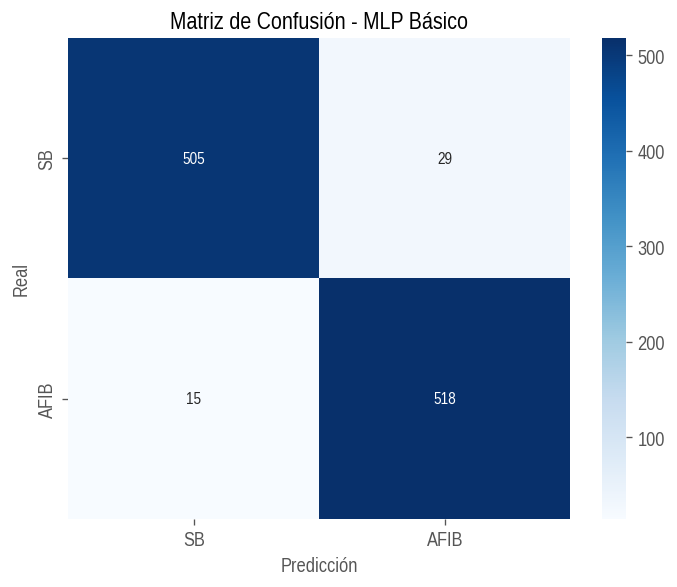

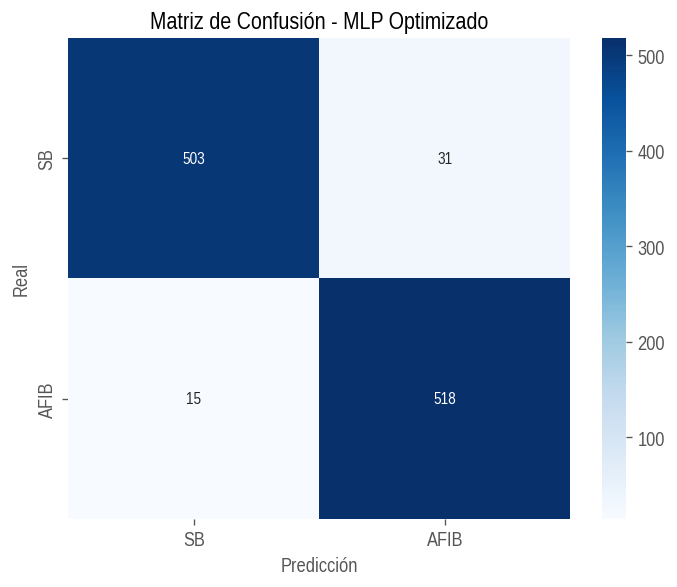

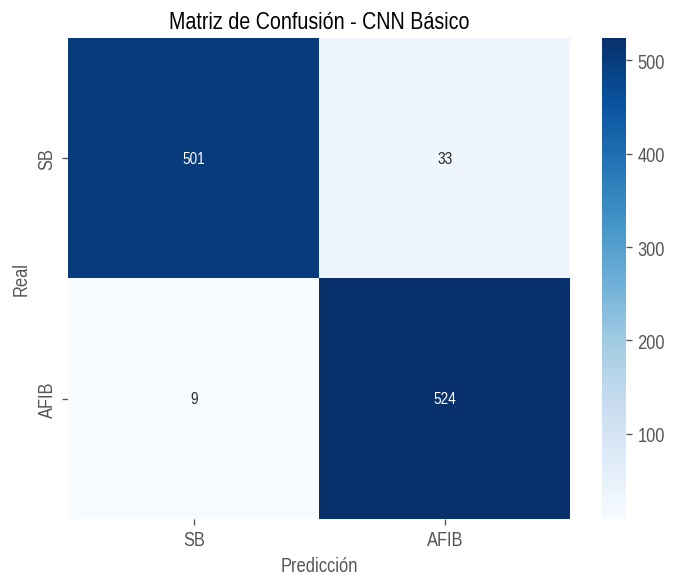

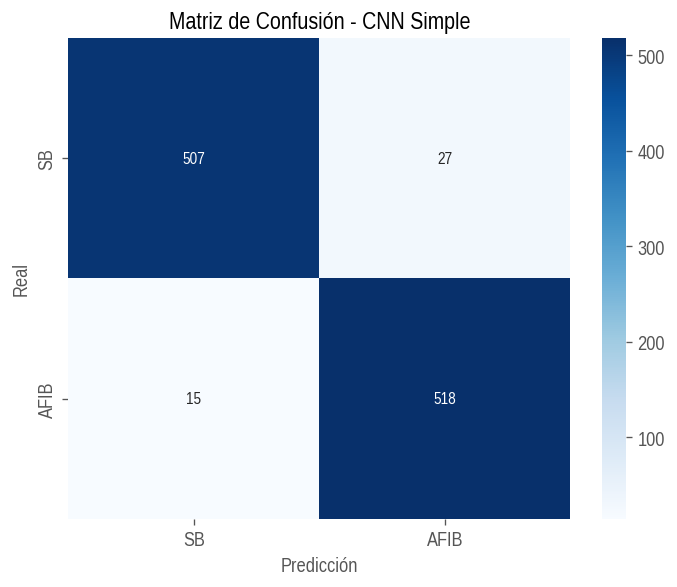

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title="Matriz de Confusión"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['SB', 'AFIB'],
                yticklabels=['SB', 'AFIB'])
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Graficar las matrices de confusión para cada modelo
plot_confusion_matrix(y_test, y_pred_test_mlp1, title="Matriz de Confusión - MLP Básico")
plot_confusion_matrix(y_test, y_pred_test_mlp2, title="Matriz de Confusión - MLP Optimizado")
plot_confusion_matrix(y_test, y_pred_test_cnn_basic, title="Matriz de Confusión - CNN Básico")
plot_confusion_matrix(y_test, y_pred_test_cnn_simple, title="Matriz de Confusión - CNN Simple")


In [71]:
from sklearn.metrics import classification_report

# Obtener las métricas de clasificación de cada modelo
report_mlp1 = classification_report(y_test, y_pred_test_mlp1, output_dict=True)
report_mlp2 = classification_report(y_test, y_pred_test_mlp2, output_dict=True)
report_cnn_basic = classification_report(y_test, y_pred_test_cnn_basic, output_dict=True)
report_cnn_simple = classification_report(y_test, y_pred_test_cnn_simple, output_dict=True)

# Extraer las métricas y organizarlas en una tabla
metrics = {
    'Modelo': ['MLP Básico', 'MLP Optimizado', 'CNN Básico', 'CNN Simple'],
    'Precisión': [
        report_mlp1['accuracy'],
        report_mlp2['accuracy'],
        report_cnn_basic['accuracy'],
        report_cnn_simple['accuracy']
    ],
    'Recall (Positivo)': [
        report_mlp1['1']['recall'],
        report_mlp2['1']['recall'],
        report_cnn_basic['1']['recall'],
        report_cnn_simple['1']['recall']
    ],
    'F1-Score (Positivo)': [
        report_mlp1['1']['f1-score'],
        report_mlp2['1']['f1-score'],
        report_cnn_basic['1']['f1-score'],
        report_cnn_simple['1']['f1-score']
    ],
}

# Crear un DataFrame para mostrar la tabla de métricas
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


           Modelo  Precisión  Recall (Positivo)  F1-Score (Positivo)
0      MLP Básico   0.958763           0.971857             0.959259
1  MLP Optimizado   0.956888           0.971857             0.957486
2      CNN Básico   0.960637           0.983114             0.961468
3      CNN Simple   0.960637           0.971857             0.961039


## Octava parte:

Consultar el funcionamiento de los algoritmos K-means y Máquinas de Soporte Vectorial (SVM). Presentar un ejemplo práctico utilizando datos del proyecto para aplicar ambos métodos, discutiendo sus características, funcionamiento y resultados obtenidos.

El análisis incluirá una comparación de las ventajas y limitaciones de cada uno, evaluando su desempeño.

**‘K-means’**


> *¿Qué es y cuál es su objetivo?*

El algoritmo K-means es un método de agrupamiento que organiza datos en grupos o "clusters" de acuerdo con sus similitudes [1]. Su objetivo es dividir un conjunto de datos en un número predefinido de grupos basándose en la proximidad de los puntos de datos a los centros de esos grupos, conocidos como centroides [2].

> *¿Cómo funciona?*

1.	Definición de ‘K’.
Se especifica cuántos grupos desea identificar en los datos para que el algoritmo divida los datos en ‘K’ grupos diferentes [1].
2.	Asignación de los centroides.
Se seleccionan ‘K’ puntos iniciales de manera aleatoria del conjunto de datos [1], estos puntos actúan como los centros iniciales de los ‘K-clusters’ [3].
3.	Asignación de puntos a los clusters.
Para cada punto de datos en el conjunto, se calcula la distancia a cada uno de los centroides. El punto se asigna al cluster cuyo centroide esté más cercano. Este proceso asegura que los puntos dentro de un mismo grupo estén más cerca entre sí que de los puntos de otros grupos [3].
4.	Recalcular los centroides.
Una vez que cada punto ha sido asignado a un cluster, el algoritmo actualiza la posición del centroide. Esto se hace calculando el promedio de todos los puntos que pertenecen a ese cluster [3,4].
5.	Repetir hasta converger.
El proceso de asignación de puntos a los clusters y recalculación de los centroides se repite varias veces. En cada iteración, los centroides tienden a estabilizarse y las asignaciones de puntos a clusters dejan de cambiar [3].
6.	Condición de parada:
El proceso se detiene por dos razones, la primera cuando se alcanza la convergencia (los centroides no cambian más o cambian muy poco entre iteraciones), si esta no se cumple, se verifica la segunda que es cuando se alcanza el número máximo de iteraciones establecido por el usuario [3].

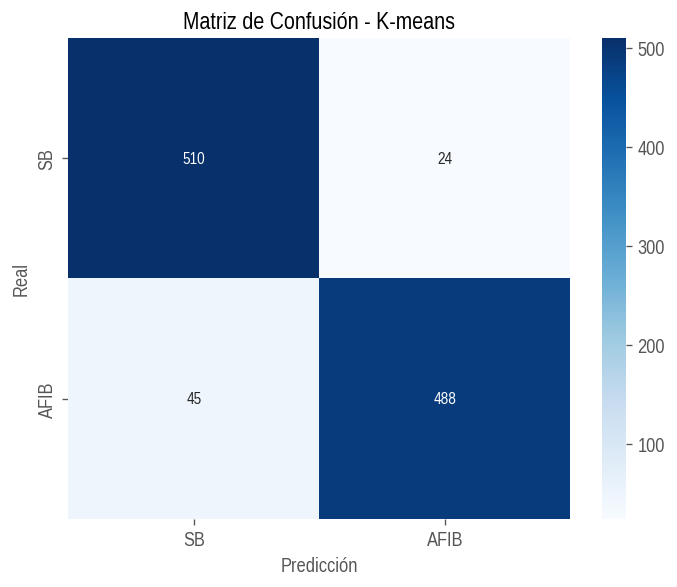

Métricas para K-means:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       534
           1       0.95      0.92      0.93       533

    accuracy                           0.94      1067
   macro avg       0.94      0.94      0.94      1067
weighted avg       0.94      0.94      0.94      1067



In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters para SB y AFIB
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)

# Mapear las predicciones de K-means a las etiquetas originales (0 y 1)
# Necesitamos encontrar la mejor correspondencia entre los clusters y las clases reales
# Ya que K-means no sabe qué cluster es cual
from collections import Counter

#Contar la frecuencia de cada cluster predicho
cluster_counts = Counter(y_pred_kmeans)

#Obtener los clusters más frecuentes
most_common_clusters = cluster_counts.most_common()

#Crear un mapeo para las predicciones
cluster_mapping = {}
for cluster, _ in most_common_clusters:
    if cluster == 0:
        cluster_mapping[0] = 0
    else:
        cluster_mapping[1] = 1

y_pred_mapped = [cluster_mapping[cluster] for cluster in y_pred_kmeans]


# Matriz de confusión y métricas
plot_confusion_matrix(y_test, y_pred_mapped, title="Matriz de Confusión - K-means")
print("Métricas para K-means:")
print(classification_report(y_test, y_pred_mapped))

**Máquinas de soporte vectorial (SVM)**
> *¿Qué es y cuál es su objetivo?*

El algoritmo de Máquinas de Soporte Vectorial (SVM, por sus siglas en inglés) es una técnica de aprendizaje supervisado utilizada en tareas de clasificación, regresión y detección de valores atípicos [5]. El objetivo principal de este algoritmo es identificar un hiperplano que separe los puntos de datos de diferentes clases de la manera más clara y eficiente posible, maximizando la distancia entre las clases en el espacio de características [6].

> *¿Cómo funciona?*

1.	Hiperplano y margen.
Un hiperplano es una línea (en dos dimensiones) o una superficie (en dimensiones superiores) que se utiliza para separar las diferentes clases de datos. El algoritmo busca el hiperplano que maximiza el margen, que es la distancia entre el hiperplano y los puntos de datos más cercanos a él, llamados vectores de soporte. Estos vectores son clave, ya que son los que determinan la ubicación del hiperplano [7,8].
2.	Clasificación lineal.
Si los datos son linealmente separables, es decir, pueden ser separados por una línea o plano sin errores, el SVM busca el hiperplano que maximice esta distancia. Este es el caso de los problemas con datos simples y bien separados. [7,8].
3.	Clasificación no lineal.
En escenarios más complejos, donde los datos no pueden separarse de manera lineal (como ocurre en muchas aplicaciones del mundo real), el SVM utiliza un truco matemático llamado truco del kernel. Este proceso transforma los datos en un espacio de características de dimensiones más altas donde se vuelve más sencillo encontrar un hiperplano separador. Los kernels comunes incluyen funciones lineales, polinómicas, de base radial (RBF) y sigmoides. [7,8].
4.	Márgenes duros y suaves
En situaciones donde los datos no son perfectamente separables (debido a ruido o errores), SVM utiliza un margen suave, lo que permite ciertos errores o violaciones en la clasificación. Esto se logra introduciendo un parámetro de penalización que controla el equilibrio entre la maximización del margen y la tolerancia a los errores.
5.	Optimización.
El entrenamiento de un SVM se puede ver como un problema de optimización, donde se ajustan los parámetros del modelo (como el hiperplano) para minimizar el error de clasificación mientras se maximizan los márgenes.

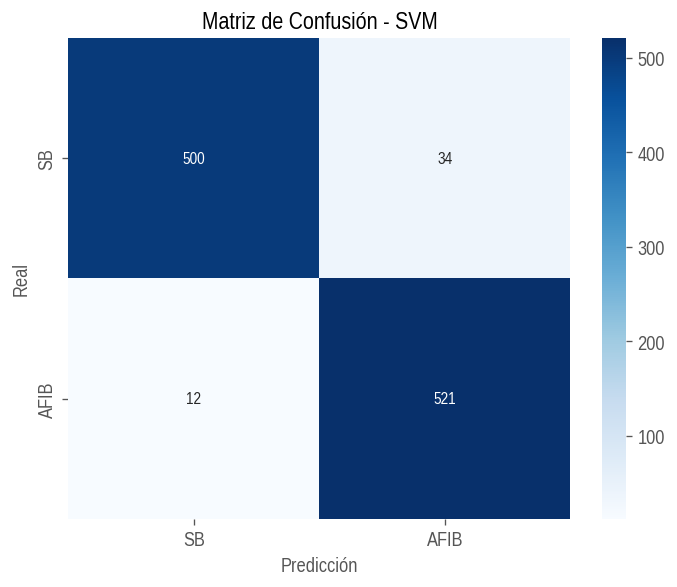

Métricas para SVM:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       534
           1       0.94      0.98      0.96       533

    accuracy                           0.96      1067
   macro avg       0.96      0.96      0.96      1067
weighted avg       0.96      0.96      0.96      1067



In [73]:
from sklearn.svm import SVC

# Modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42) # Puedes ajustar el kernel, C y gamma
svm_model.fit(X_train, y_train)

# Predicciones
y_pred_svm = svm_model.predict(X_test)

# Matriz de confusión y métricas
plot_confusion_matrix(y_test, y_pred_svm, title="Matriz de Confusión - SVM")
print("Métricas para SVM:")
print(classification_report(y_test, y_pred_svm))


## Análisis finales:

*   El equipo **MAC VU360 Resting ECG** [9] incorpora algoritmos de ayuda diagnóstica para mejorar la calidad, precisión y eficiencia en la interpretación de las señales cardíacas mediante el uso de un algoritmo que captura automáticamente la primera señal de ECG limpia y de alta calidad que, según denomina el proveedor, se le denomina “Smart Auto-ECG Algorithm”. Además de esto, este proporciona guías en tiempo real para asegurar la obtención de ondas de alta calidad mediante el uso de su tecnología denominada “Enhanced Hookup Advisor”.
El sistema incorpora el algoritmo “Marquette™ 12SL™”, que cumple con los estándares de calidad e industria para el análisis de señales ECG de 12 derivaciones.
Integra herramientas como el módulo “Full Disclosure”, que permite analizar cualquier segmento de 10 segundos en memoria y generar informes condensados para acelerar la revisión clínica.

*   El equipo **Philips PageWriter TC70** [10] incorpora algoritmos de ayuda diagnóstica para proporcionar interpretaciones automáticas y precisas del ECG, esto lo logra mediante su algoritmo “DXL ECG” que analiza señales de hasta 18 contactos simultáneamente, así, este equipo o frece un diagnóstico avanzado para situaciones críticas como STEMI (Infarto Agudo de Miocardio con Elevación del Segmento ST), identificando la arteria responsable y proporcionando mapas ST polares detallados.
El equipo destaca automáticamente valores críticos en pantalla y en los informes impresos, esto lo logra debido a que tiene la capacidad de almacenar y comparar ECGs previos obtenidos del seguimiento del paciente.
El módulo LeadCheck detecta errores en la ubicación de los electrodos y alerta al usuario para garantizar la calidad de las señales.

*   El equipo **AliveCor – KardiaMobile 6L** [11] tiene la capacidad de procesar y analizar datos cardíacos en tiempo real ya que registra derivaciones I, II, III, aVL, aVR y aVF, lo que proporciona una visión más detallada del ritmo cardíaco y las procesa con su algoritmo interno “Análisis instantáneo de AliveCor” generando interpretaciones automáticas del ritmo cardíaco, siendo capaz de identificar fibrilación auricular (AFib), bradicardia y taquicardia.



---


**REFERENCIAS BIBLIIOGRÁFICAS.**

[1] I. Dabbura, “K-means clustering: Algorithm, applications, evaluation methods, and drawbacks,” Medium, 2018. [En línea]. Disponible en: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a.

[2] A. Apsemidis, S. Psarakis, and J. M. Moguerza, “A review of machine learning kernel methods in statistical process monitoring,” Computers & Industrial Engineering, vol. 142, p. 106376, abr. 2020, doi: https://doi.org/10.1016/j.cie.2020.106376.

[3] H. Pirim, B. Ekşioğlu, A. D. Perkins, and Ç. Yüceer, “Clustering of high throughput gene expression data,” Computers & Operations Research, vol. 39, no. 12, pp. 3046–3061, mar. 2012, doi: https://doi.org/10.1016/j.cor.2012.03.008.

[4] P. Sharma, “The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need,” Analytics Vidhya, 19 ago. 2019. [En línea]. Disponible en: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/.

[5] V. Kanade, “What Is a Support Vector Machine? Working, Types, and Examples,” Spiceworks, 29 sep. 2022. [En línea]. Disponible en: https://www.spiceworks.com/tech/big-data/articles/what-is-support-vector-machine/.

[6] TheMathWorks, “Support Vector Machine (SVM),” la.mathworks.com, 2024. [En línea]. Disponible en: https://la.mathworks.com/discovery/support-vector-machine.html.

[7] IBM Documentation Help, “Funcionamiento de SVM,” IBM, 17 ago. 2021. [En línea]. Disponible en: https://www.ibm.com/docs/es/spss-modeler/saas?topic=models-how-svm-works.

[8] GeeksforGeeks, “Support Vector Machine (SVM) Algorithm,” GeeksforGeeks, 20 ene. 2021. [En línea]. Disponible en: https://www.geeksforgeeks.org/support-vector-machine-algorithm/#how-does-support-vector-machine-algorithm-work.

[9] GE HealthCare, “MAC VU360 Resting ECG,” Gehealthcare.com, 2024. [En línea]. Disponible en: https://www.gehealthcare.com/products/diagnostic-ecg/resting-ecg/mac-vu360?srsltid=AfmBOoojEFWgNna9WQ-LmoVhe0KkDYwfJPm8fGetH_hqcKhvTdswqiSz.

[10] Koninklijke Philips N.V., “Cardiógrafos PageWriter TC70,” Philips, 2024. [En línea]. Disponible en: https://www.philips.es/healthcare/product/HC860315/cardigrafos-pagewriter-tc70-cardigrafo.

[11] Instrucciones de uso (IFU) de KardiaMobile 6L (AC-019) 19LB01.01, AliveCor, Inc., 2019. [En línea]. Disponible en: https://www.alivecor.de/previous-labeling/km6l_ifu/19LB10.01%20Spanish.pdf.

[12] N. M. Saad, A. R. Abdullah, and Y. F. Low, “Detection of heart blocks in ECG signals by spectrum and time-frequency analysis,” en 2006 4th Student Conference on Research and Development, Shah Alam, Malasia, 2006, pp. 61-65, doi: 10.1109/SCORED.2006.4339309.

[13] D.-H. Jang et al., “Developing neural network models for early detection of cardiac arrest in emergency department,” The American Journal of Emergency Medicine, vol. 38, no. 1, pp. 43–49, ene. 2020, doi: https://doi.org/10.1016/j.ajem.2019.04.006.